In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [40]:
#Read Data
pd.set_option('display.max_columns',500)
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [41]:
#Investigating and Analysing Missing Values
print(round(df.isnull().sum(axis=0)/len(df),6)*100)

SK_ID_CURR                     0.0000
TARGET                         0.0000
NAME_CONTRACT_TYPE             0.0000
CODE_GENDER                    0.0000
FLAG_OWN_CAR                   0.0000
FLAG_OWN_REALTY                0.0000
CNT_CHILDREN                   0.0000
AMT_INCOME_TOTAL               0.0000
AMT_CREDIT                     0.0000
AMT_ANNUITY                    0.0039
AMT_GOODS_PRICE                0.0904
NAME_TYPE_SUITE                0.4201
NAME_INCOME_TYPE               0.0000
NAME_EDUCATION_TYPE            0.0000
NAME_FAMILY_STATUS             0.0000
NAME_HOUSING_TYPE              0.0000
REGION_POPULATION_RELATIVE     0.0000
DAYS_BIRTH                     0.0000
DAYS_EMPLOYED                  0.0000
DAYS_REGISTRATION              0.0000
DAYS_ID_PUBLISH                0.0000
OWN_CAR_AGE                   65.9908
FLAG_MOBIL                     0.0000
FLAG_EMP_PHONE                 0.0000
FLAG_WORK_PHONE                0.0000
FLAG_CONT_MOBILE               0.0000
FLAG_PHONE  

In [42]:
df=df.loc[:,df.isna().sum(axis=0)/len(df)<0.40]
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.00

In [43]:
#Removing irrelevant columns
df=df.loc[:,:'EXT_SOURCE_2']
df=df.drop(['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
         'FLAG_CONT_MOBILE','FLAG_EMAIL','FLAG_PHONE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'],axis=1)

In [44]:
print(round(df.isnull().sum(axis=0)/len(df),6)*100)

SK_ID_CURR                      0.0000
TARGET                          0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
OCCUPATION_TYPE                31.3455
CNT_FAM_MEMBERS                 0.0007
REGION_RATING_CLIENT            0.0000
REGION_RATING_CLIENT_W_CITY     0.0000
ORGANIZATION_TYPE               0.0000
EXT_SOURCE_2             

In [45]:
df.shape

(307511, 26)

In [46]:
#checking the datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH             

In [47]:
#finding the outlier in the dataset
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [48]:
df=df.drop(df[df['DAYS_EMPLOYED']==365243].index)
df

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,Business Entity Type 3,0.262949
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,School,0.622246
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,Government,0.555912
3,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442
4,100007,0,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,Religion,0.322738
5,100008,0,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,2.0,2,2,Other,0.354225
6,100009,0,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,Accountants,3.0,2,2,Business Entity Type 3,0.724000
7,100010,0,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,Managers,2.0,3,3,Other,0.714279
9,100012,0,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,Laborers,1.0,2,2,Electricity,0.746644
10,100014,0,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,Core staff,3.0,2,2,Medicine,0.651862


In [49]:
#finding outlier in CODE_GENDER
df['CODE_GENDER'].value_counts()

F      157177
M       94956
XNA         4
Name: CODE_GENDER, dtype: int64

In [50]:
df=df.drop(df[df['CODE_GENDER']=='XNA'].index)

In [51]:
df['AMT_CREDIT'].describe()

count    2.521330e+05
mean     6.114018e+05
std      4.065294e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [52]:
#Binning the AMT_CREDIT According to the Quartile and removing the outlier
l1= list(df['AMT_CREDIT'].quantile([0.25,0.5,0.75,0.99]).astype(int))
def Cat(x):
    if (x<=l1[0]):
        return 'Low'
    elif (x>l1[0]) & (x<=l1[1]):
        return 'Medium'
    elif (x>l1[1]) & (x<=l1[2]):
        return 'High'
    elif (x>l1[2]) & (x<=l1[3]):
        return 'Very_High'
    else:
        return 'Outlier'
df['Crd_Cat_Req'] = df['AMT_CREDIT'].apply(lambda x: Cat(x))

In [54]:
outlier_crd=df[df['Crd_Cat_Req']=='Outlier']
outlier_crd

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,Crd_Cat_Req
189,100219,0,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-11177,-1514,-64.0,-2793,Core staff,3.0,1,1,Business Entity Type 3,0.693358,Outlier
337,100389,0,M,Y,Y,0,247500.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006207,-14216,-365,-3183.0,-4423,Core staff,2.0,2,2,Self-employed,0.748204,Outlier
341,100393,0,M,Y,Y,2,405000.0,2250000.0,59485.5,2250000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.007114,-14966,-6158,-954.0,-4979,Core staff,4.0,2,2,Police,0.682320,Outlier
441,100508,0,F,Y,Y,0,450000.0,1971072.0,62019.0,1800000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.032561,-18268,-2569,-4292.0,-1699,Managers,2.0,1,1,Trade: type 3,0.774368,Outlier
485,100559,0,F,Y,Y,0,450000.0,2286211.5,116266.5,2182500.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.018850,-20589,-13994,-5893.0,-4106,Core staff,2.0,2,2,Security Ministries,0.503266,Outlier
639,100730,0,F,N,Y,1,315000.0,1971072.0,62019.0,1800000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-16938,-1744,-3240.0,-496,Accountants,3.0,1,1,Business Entity Type 1,0.783543,Outlier
667,100771,0,M,N,Y,1,288000.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020246,-17087,-5171,-1166.0,-518,Managers,3.0,3,3,Industry: type 9,0.419168,Outlier
748,100861,0,M,N,N,0,306000.0,2085120.0,72477.0,1800000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-14206,-5632,-185.0,-4669,Private service staff,2.0,2,2,Other,0.636162,Outlier
871,100999,0,M,Y,N,0,450000.0,2125953.0,81108.0,1984500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,With parents,0.072508,-10121,-1354,-1393.0,-2672,High skill tech staff,1.0,1,1,Business Entity Type 1,0.683097,Outlier
1243,101468,0,M,Y,N,1,247891.5,2254500.0,65988.0,2254500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.031329,-11361,-1252,-5403.0,-3572,Sales staff,3.0,2,2,Trade: type 7,0.540325,Outlier


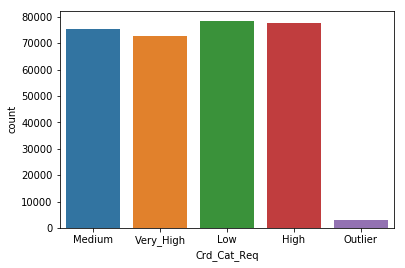

In [28]:
sns.countplot(x='Crd_Cat_Req',data=df)

In [57]:
#Binning the AMT_INCOME_TOTAL According to the Quartile and finding the outlier 
l1= list(df['AMT_INCOME_TOTAL'].quantile([0.25,0.5,0.75,0.995]).astype(int))
print(l1)

[112500, 157500, 211500, 675000]


In [58]:
df['Income_cat'] = df['AMT_INCOME_TOTAL'].apply(lambda x: Cat(x))

In [59]:
Outlier_Incm=df[df['Income_cat']=='Outlier']
Outlier_Incm

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,Crd_Cat_Req,Income_cat
319,100366,0,M,Y,Y,0,765000.0,1350000.0,67500.0,1350000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.002506,-11788,-3144,-5643.0,-3962,Managers,1.0,2,2,Business Entity Type 3,0.765981,Very_High,Outlier
1238,101461,0,M,Y,Y,0,810000.0,661500.0,37066.5,661500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.072508,-21766,-5065,-11148.0,-1374,Drivers,2.0,1,1,Business Entity Type 3,0.629307,High,Outlier
1504,101769,0,M,Y,Y,0,1080000.0,180000.0,9000.0,180000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,-13633,-5536,-3.0,-4971,NaN,2.0,1,1,Business Entity Type 3,0.652924,Low,Outlier
1586,101857,0,F,N,Y,0,720000.0,1125000.0,44617.5,1125000.0,Unaccompanied,Commercial associate,Higher education,Widow,House / apartment,0.046220,-21630,-1059,-13.0,-1726,NaN,1.0,1,1,Other,0.687675,Very_High,Outlier
1644,101929,1,F,Y,Y,0,697500.0,450000.0,22500.0,450000.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-23299,-2550,-2591.0,-103,Medicine staff,2.0,1,1,Medicine,0.696737,Medium,Outlier
2009,102356,0,M,Y,Y,1,765000.0,1350000.0,51552.0,1350000.0,Unaccompanied,Working,Incomplete higher,Separated,House / apartment,0.010643,-10186,-3012,-4912.0,-2857,NaN,2.0,2,2,Business Entity Type 3,0.655970,Very_High,Outlier
2378,102782,0,F,N,Y,0,693000.0,835380.0,40320.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-10076,-1773,-4874.0,-2557,NaN,2.0,1,1,Business Entity Type 3,0.550118,Very_High,Outlier
3209,103747,0,F,Y,Y,0,810000.0,900000.0,94509.0,900000.0,"Spouse, partner",Working,Higher education,Married,House / apartment,0.046220,-17420,-4215,-2907.0,-969,Sales staff,2.0,1,1,Self-employed,0.618368,Very_High,Outlier
3287,103838,0,M,Y,Y,0,810000.0,630000.0,59035.5,630000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.046220,-10712,-1498,-4857.0,-3379,NaN,1.0,1,1,Business Entity Type 3,0.731254,High,Outlier
3371,103938,0,F,N,N,1,1350000.0,2410380.0,109053.0,2250000.0,NaN,Commercial associate,Higher education,Married,House / apartment,0.072508,-12213,-843,-757.0,-4132,Managers,3.0,1,1,Housing,0.724541,Outlier,Outlier


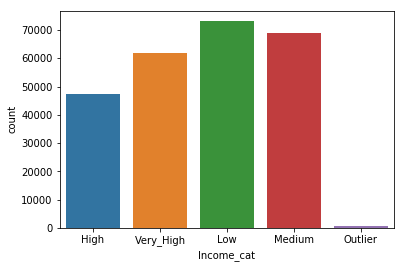

In [60]:
sns.countplot(x='Income_cat',data=df)

In [61]:
#Data Imbalance in the Target variable 
df['TARGET'].value_counts()

0    230298
1     21835
Name: TARGET, dtype: int64

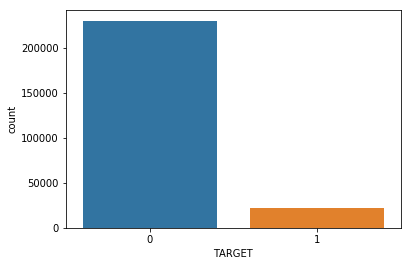

In [62]:
#plotting the Data imbalance in the Target variable 
sns.countplot(x='TARGET',data=df)

In [63]:
# Segementing the value og Taget variable
Tg_0=df[df['TARGET']==0]
Tg_1=df[df['TARGET']==1]

In [64]:
# Imbalance Percentage
print((len(Tg_0)-len(Tg_1))/len(Tg_0)*100)

90.51880606865886


In [65]:
Tg_0

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,Crd_Cat_Req,Income_cat
1,100003,0,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,School,0.622246,Very_High,Very_High
2,100004,0,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,Government,0.555912,Low,Low
3,100006,0,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,Business Entity Type 3,0.650442,Medium,Medium
4,100007,0,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,Religion,0.322738,Medium,Medium
5,100008,0,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,2.0,2,2,Other,0.354225,Medium,Low
6,100009,0,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,Accountants,3.0,2,2,Business Entity Type 3,0.724000,Very_High,High
7,100010,0,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,Managers,2.0,3,3,Other,0.714279,Very_High,Very_High
9,100012,0,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,Laborers,1.0,2,2,Electricity,0.746644,Medium,Medium
10,100014,0,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,Core staff,3.0,2,2,Medicine,0.651862,High,Low
12,100016,0,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-13439,-2717,-311.0,-3227,Laborers,2.0,2,2,Business Entity Type 2,0.715042,Low,Low


<b>Univariate Analysis of Categorical variable<b>

In [134]:
#performing the univariate analysis on categorical variable on TG_0
def plot_ct(var,d):
    sns.countplot(x=var,data=d)

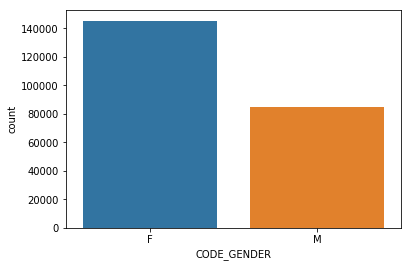

In [135]:
plot_ct('CODE_GENDER',Tg_0)

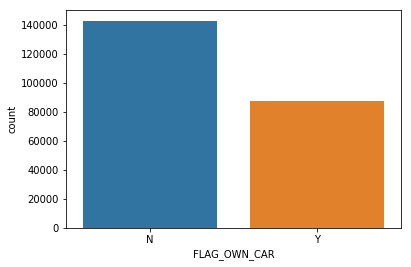

In [136]:
plot_ct('FLAG_OWN_CAR',Tg_0)

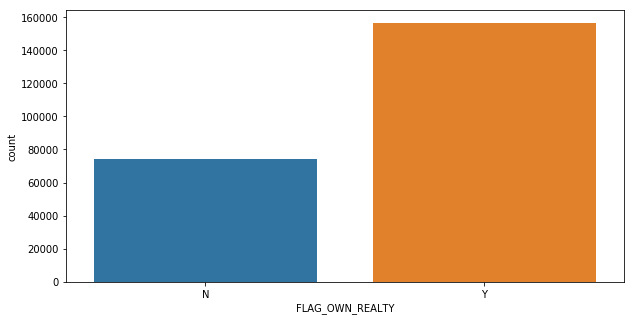

In [165]:
plot_ct('FLAG_OWN_REALTY',Tg_0)

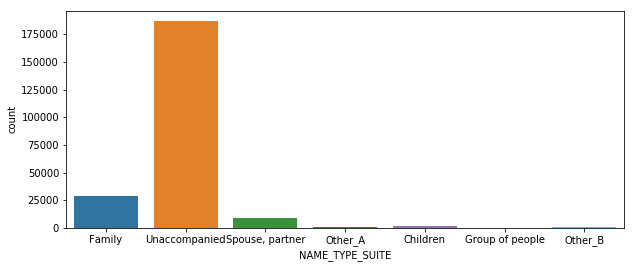

In [166]:
plt.figure(figsize=(10,4))
plot_ct('NAME_TYPE_SUITE',Tg_0)

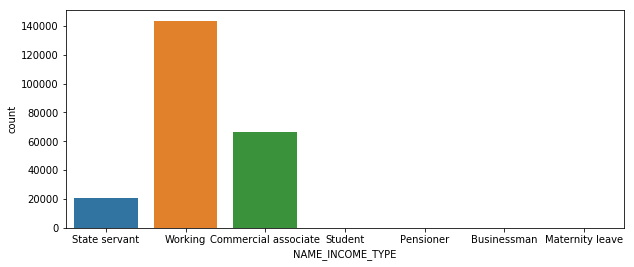

In [167]:
plt.figure(figsize=(10,4))
plot_ct('NAME_INCOME_TYPE',Tg_0)

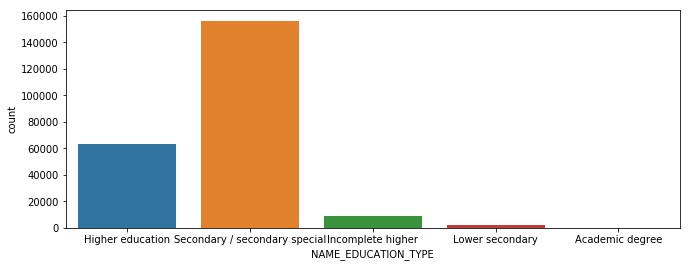

In [169]:
plt.figure(figsize=(11,4))
plot_ct('NAME_EDUCATION_TYPE',Tg_0)

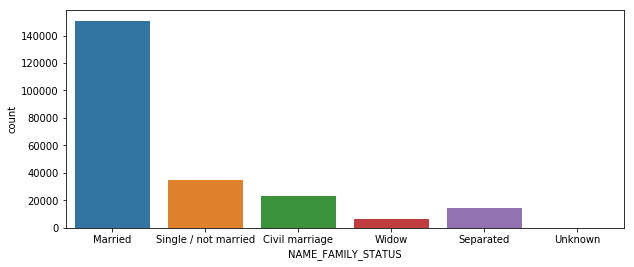

In [170]:
plt.figure(figsize=(10,4))
plot_ct('NAME_FAMILY_STATUS',Tg_0)

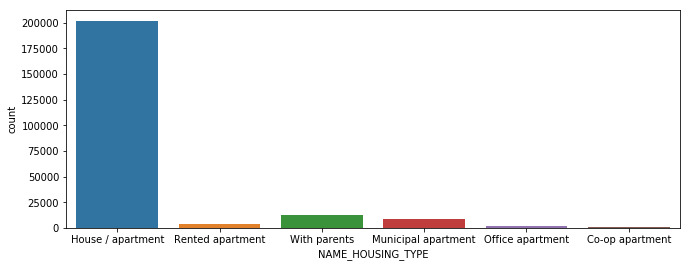

In [172]:
plt.figure(figsize=(11,4))
plot_ct('NAME_HOUSING_TYPE',Tg_0)

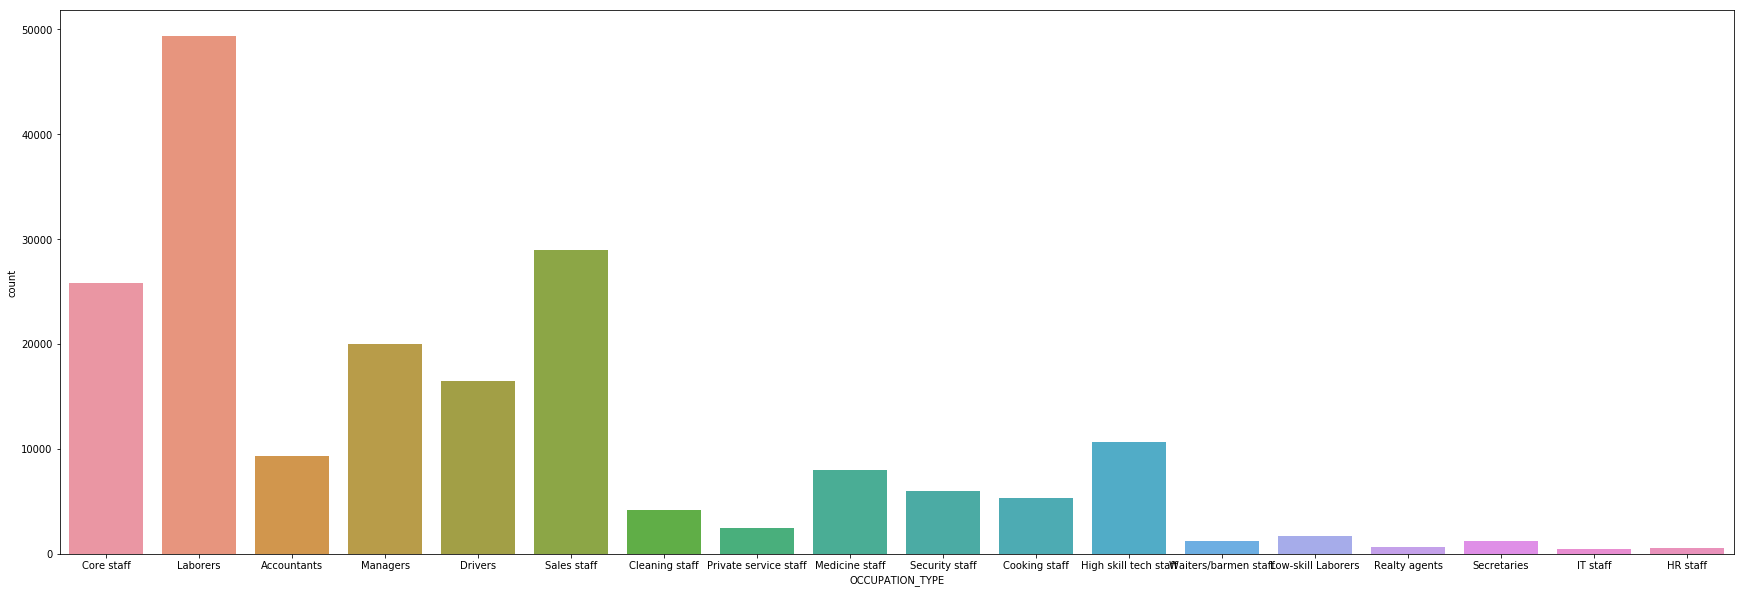

In [175]:
plt.figure(figsize=(30,10))
plot_ct('OCCUPATION_TYPE',Tg_0)

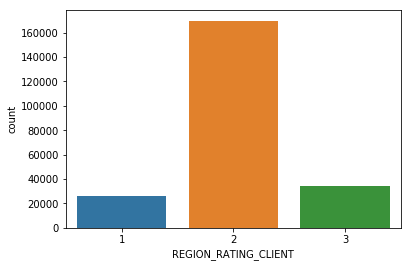

In [146]:
plot_ct('REGION_RATING_CLIENT',Tg_0)

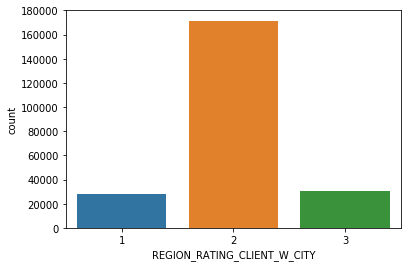

In [147]:
plot_ct('REGION_RATING_CLIENT_W_CITY',Tg_0)

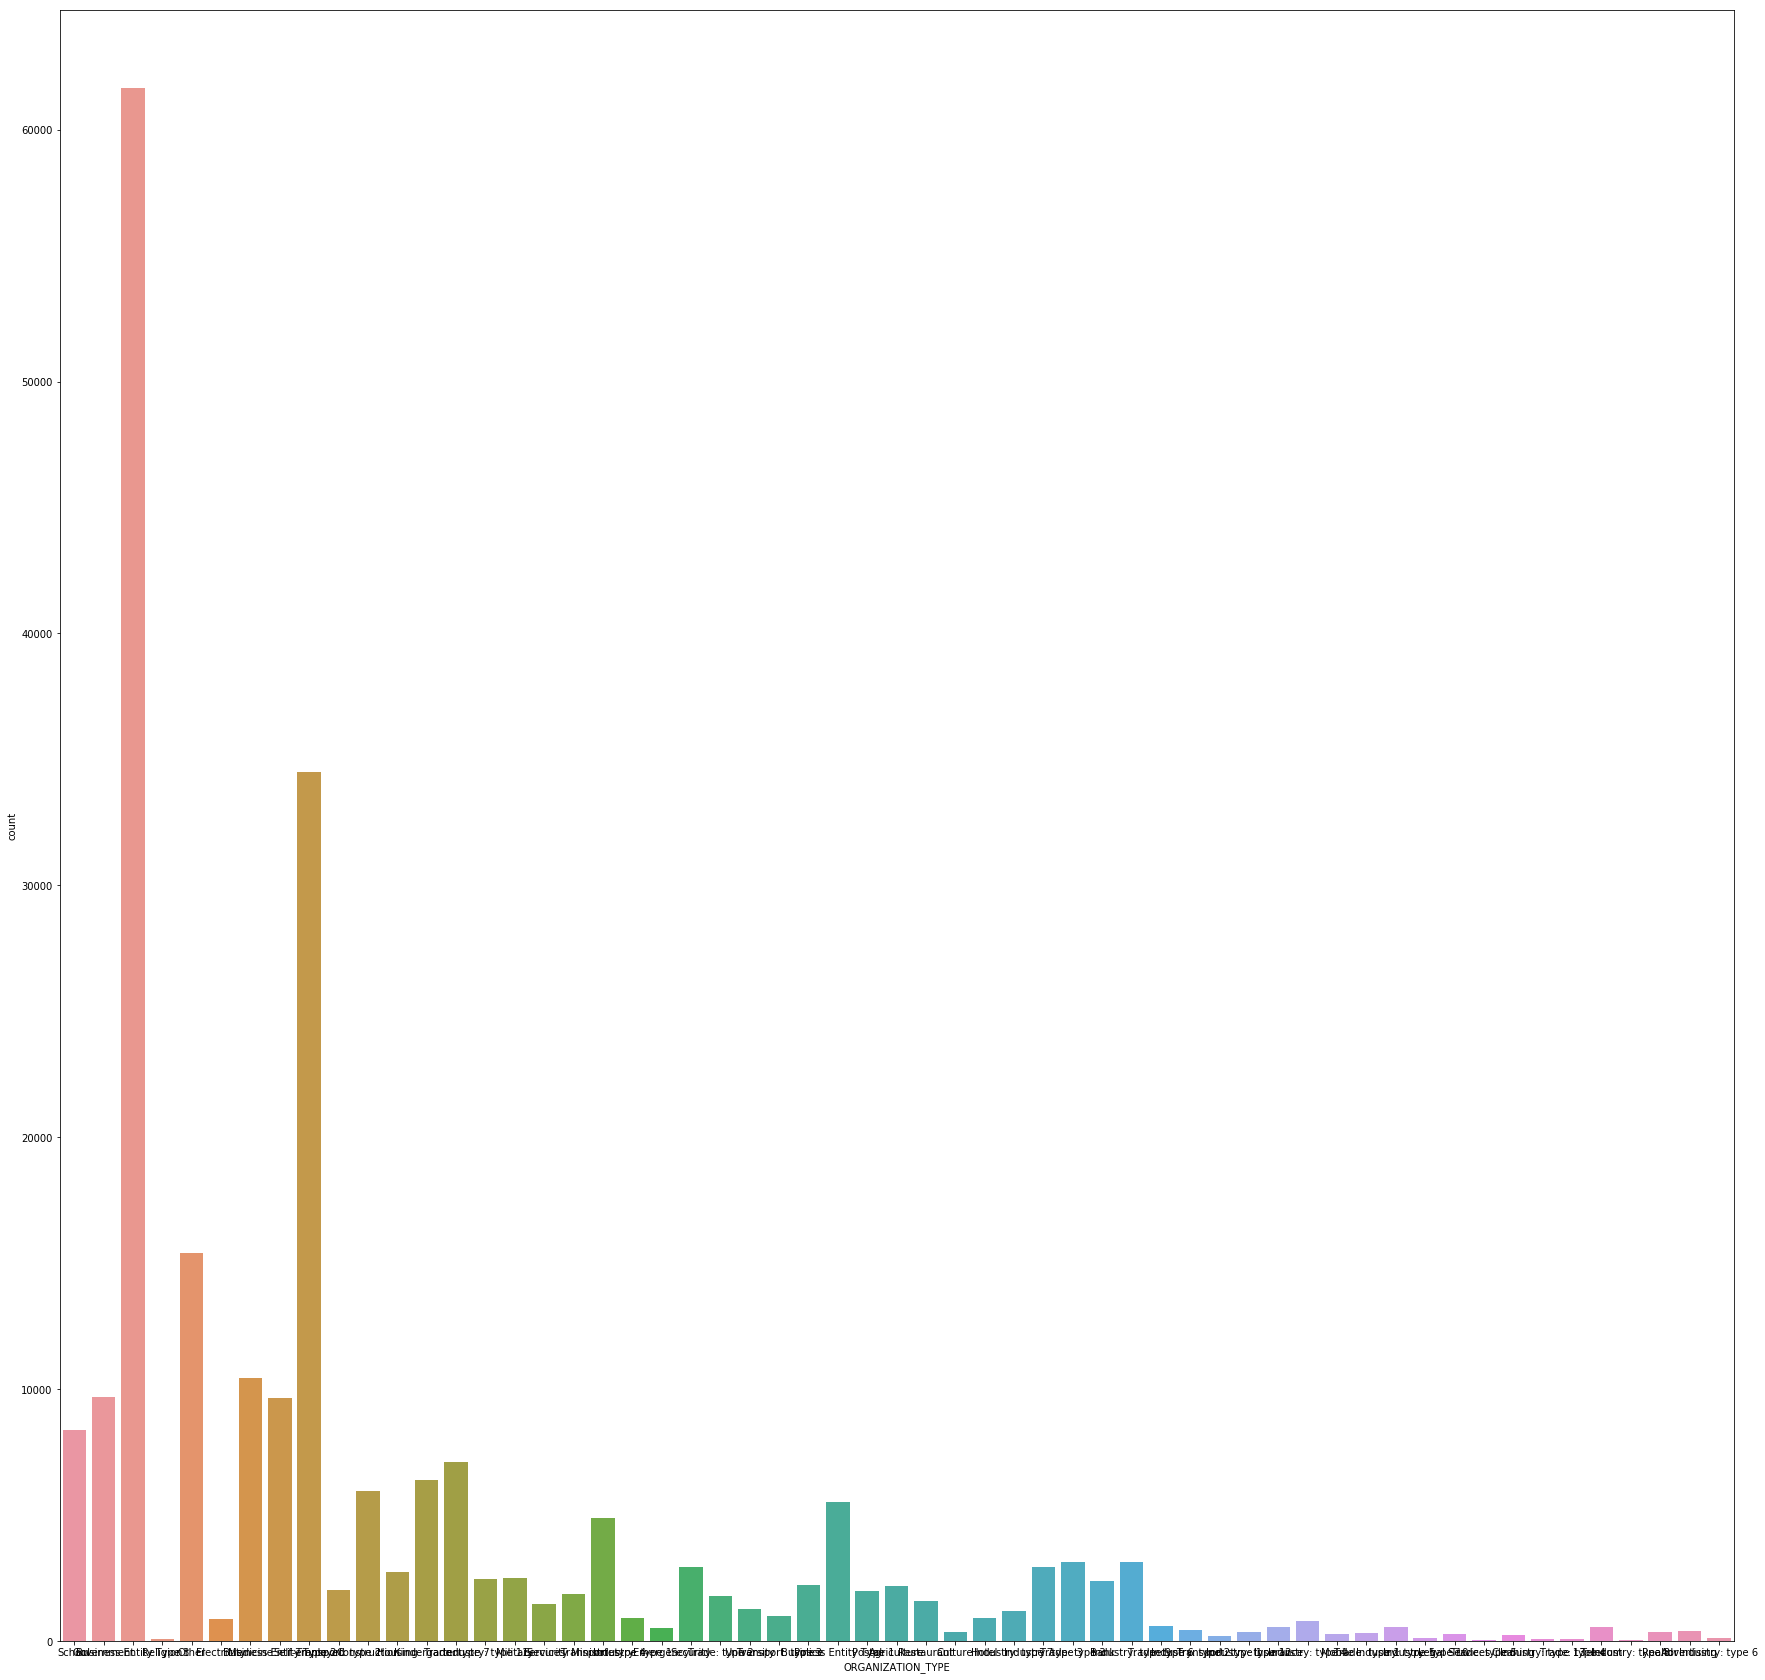

In [176]:
plt.figure(figsize=(30,30))
plot_ct('ORGANIZATION_TYPE',Tg_0)

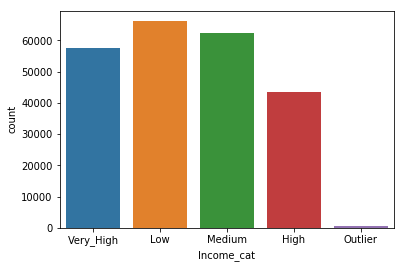

In [149]:
plot_ct('Income_cat',Tg_0)

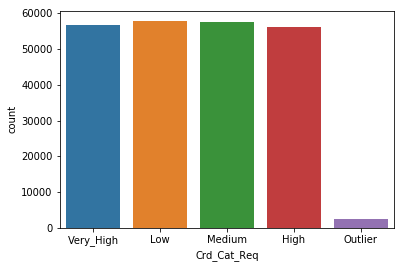

In [150]:
plot_ct('Crd_Cat_Req',Tg_0)

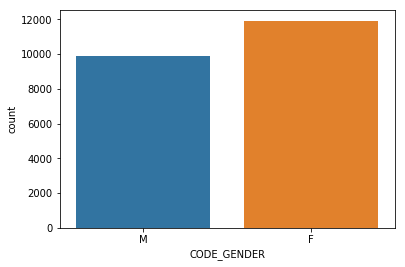

In [151]:
#performing the univariate analysis on categorical variable on TG_1
plot_ct('CODE_GENDER',Tg_1)

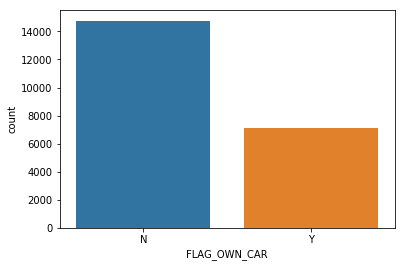

In [152]:
plot_ct('FLAG_OWN_CAR',Tg_1)

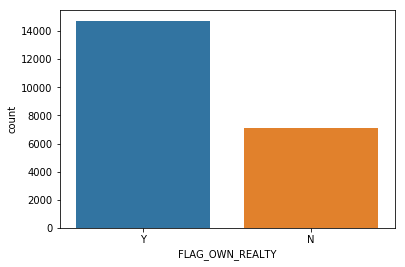

In [153]:
plot_ct('FLAG_OWN_REALTY',Tg_1)

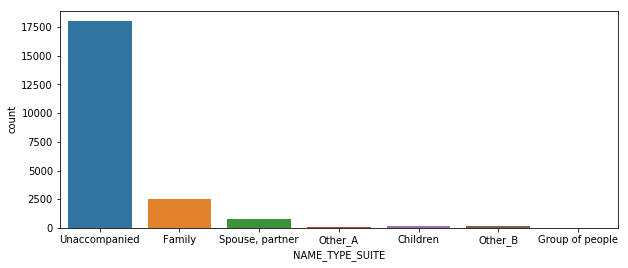

In [177]:
plt.figure(figsize=(10,4))
plot_ct('NAME_TYPE_SUITE',Tg_1)

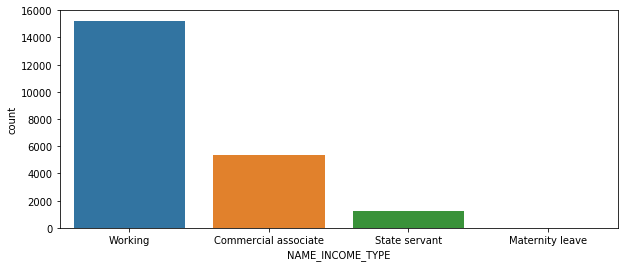

In [178]:
plt.figure(figsize=(10,4))
plot_ct('NAME_INCOME_TYPE',Tg_1)

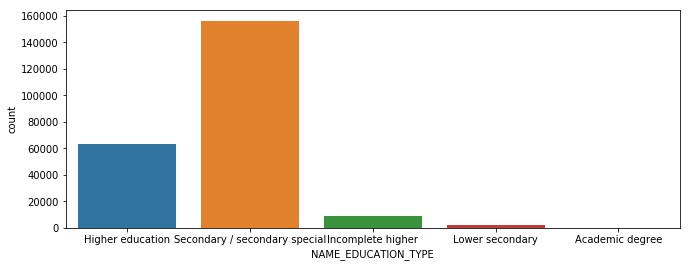

In [180]:
plt.figure(figsize=(11,4))
plot_ct('NAME_EDUCATION_TYPE',Tg_0)

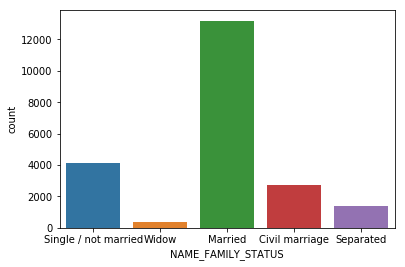

In [157]:
plot_ct('NAME_FAMILY_STATUS',Tg_1)

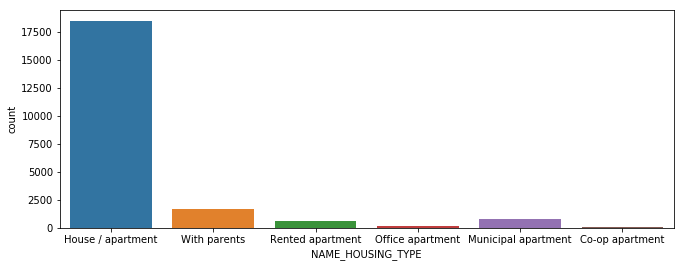

In [186]:
plt.figure(figsize=(11,4))
plot_ct('NAME_HOUSING_TYPE',Tg_1)

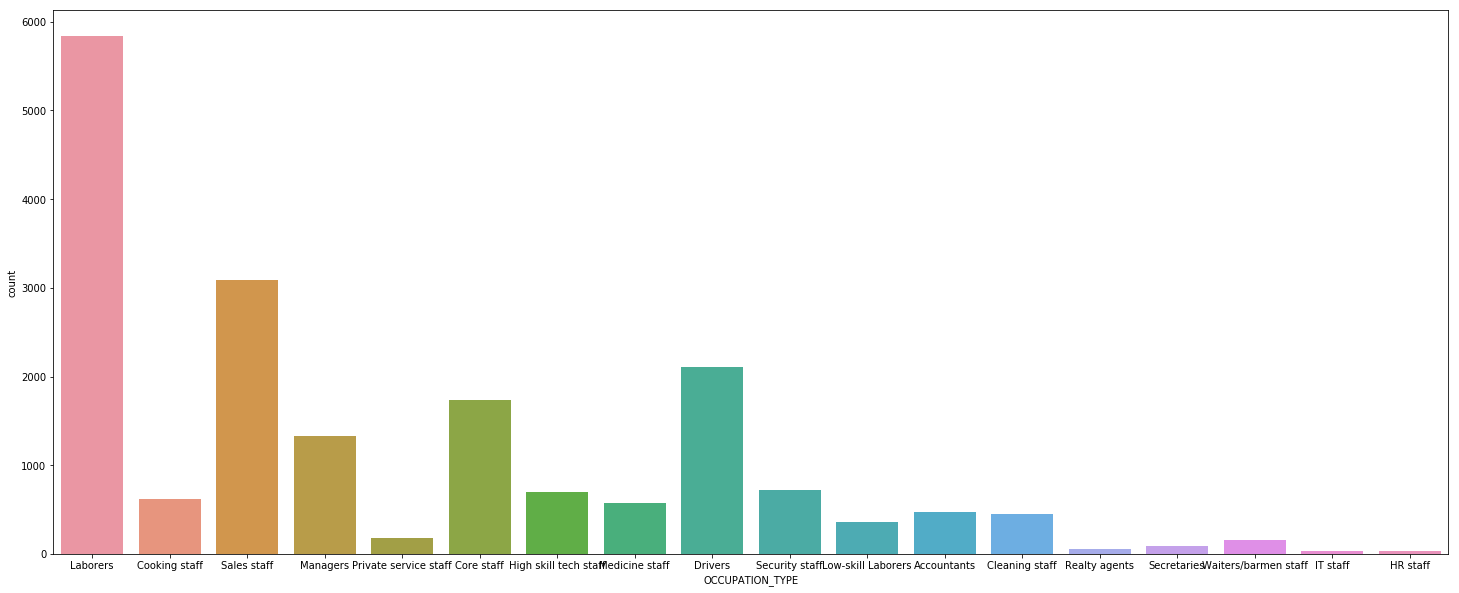

In [185]:
plt.figure(figsize=(25,10))
plot_ct('OCCUPATION_TYPE',Tg_1)

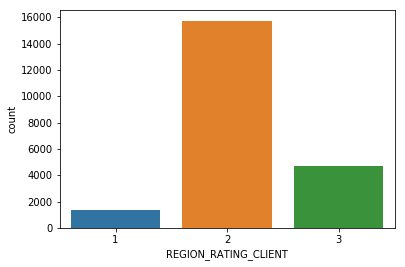

In [160]:
plot_ct('REGION_RATING_CLIENT',Tg_1)

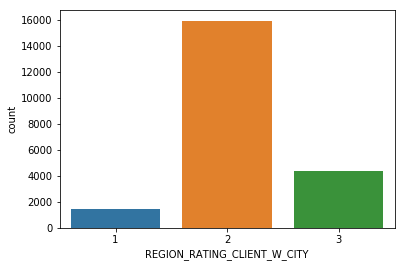

In [161]:
plot_ct('REGION_RATING_CLIENT_W_CITY',Tg_1)

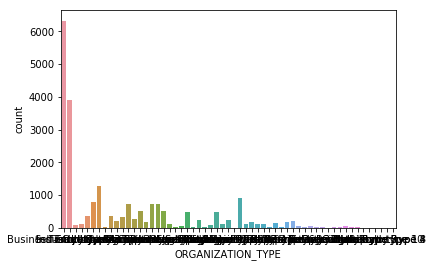

In [162]:
plot_ct('ORGANIZATION_TYPE',Tg_1)

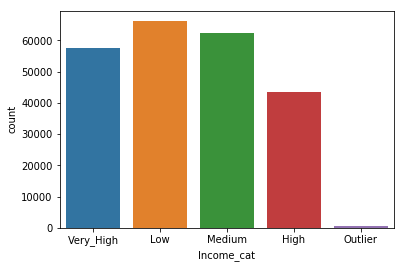

In [163]:
plot_ct('Income_cat',Tg_1)

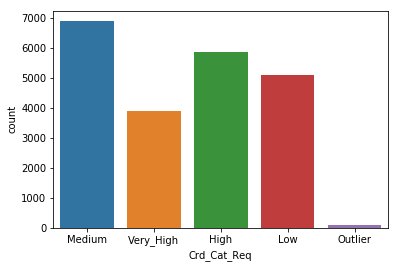

In [164]:
plot_ct('Crd_Cat_Req',Tg_1)

In [197]:
#selecting the numerical columns from tg_0 
df0_num=Tg_0.select_dtypes(include=['int','int16','int32','int64','float','float32','float64'])
df0_num=df0_num.drop('TARGET',axis=1)

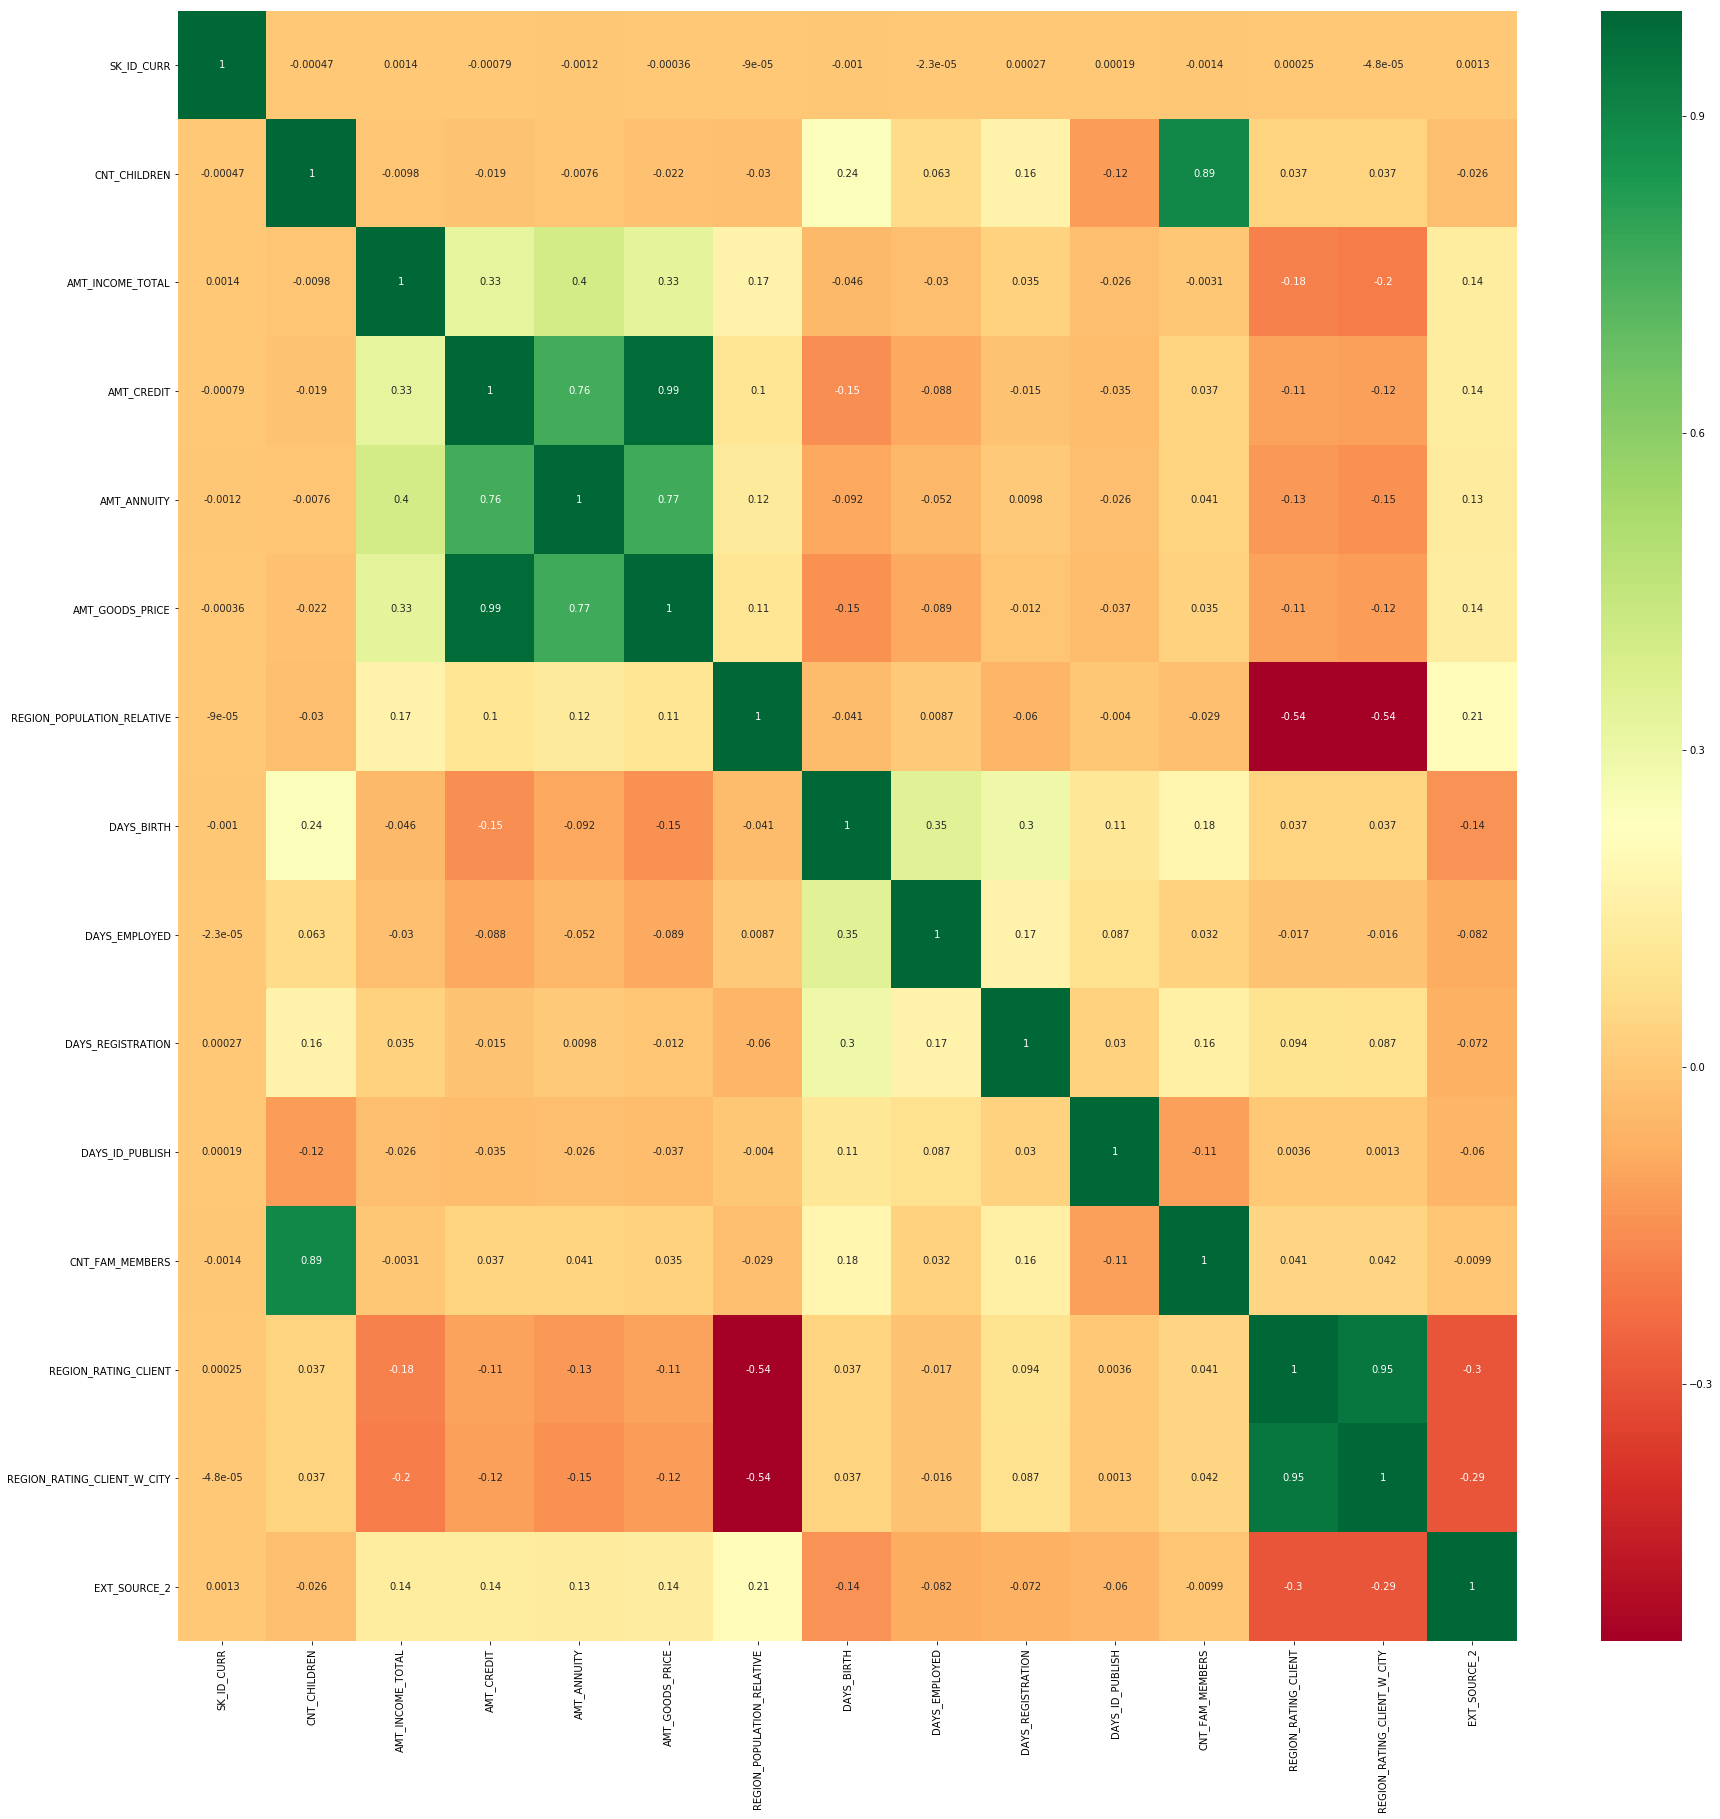

In [198]:
corrmat = df0_num.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df0_num[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [199]:
#selecting the numerical columns from tg_0 
df1_num=Tg_1.select_dtypes(include=['int','int16','int32','int64','float','float32','float64'])
df1_num=df1_num.drop('TARGET',axis=1)

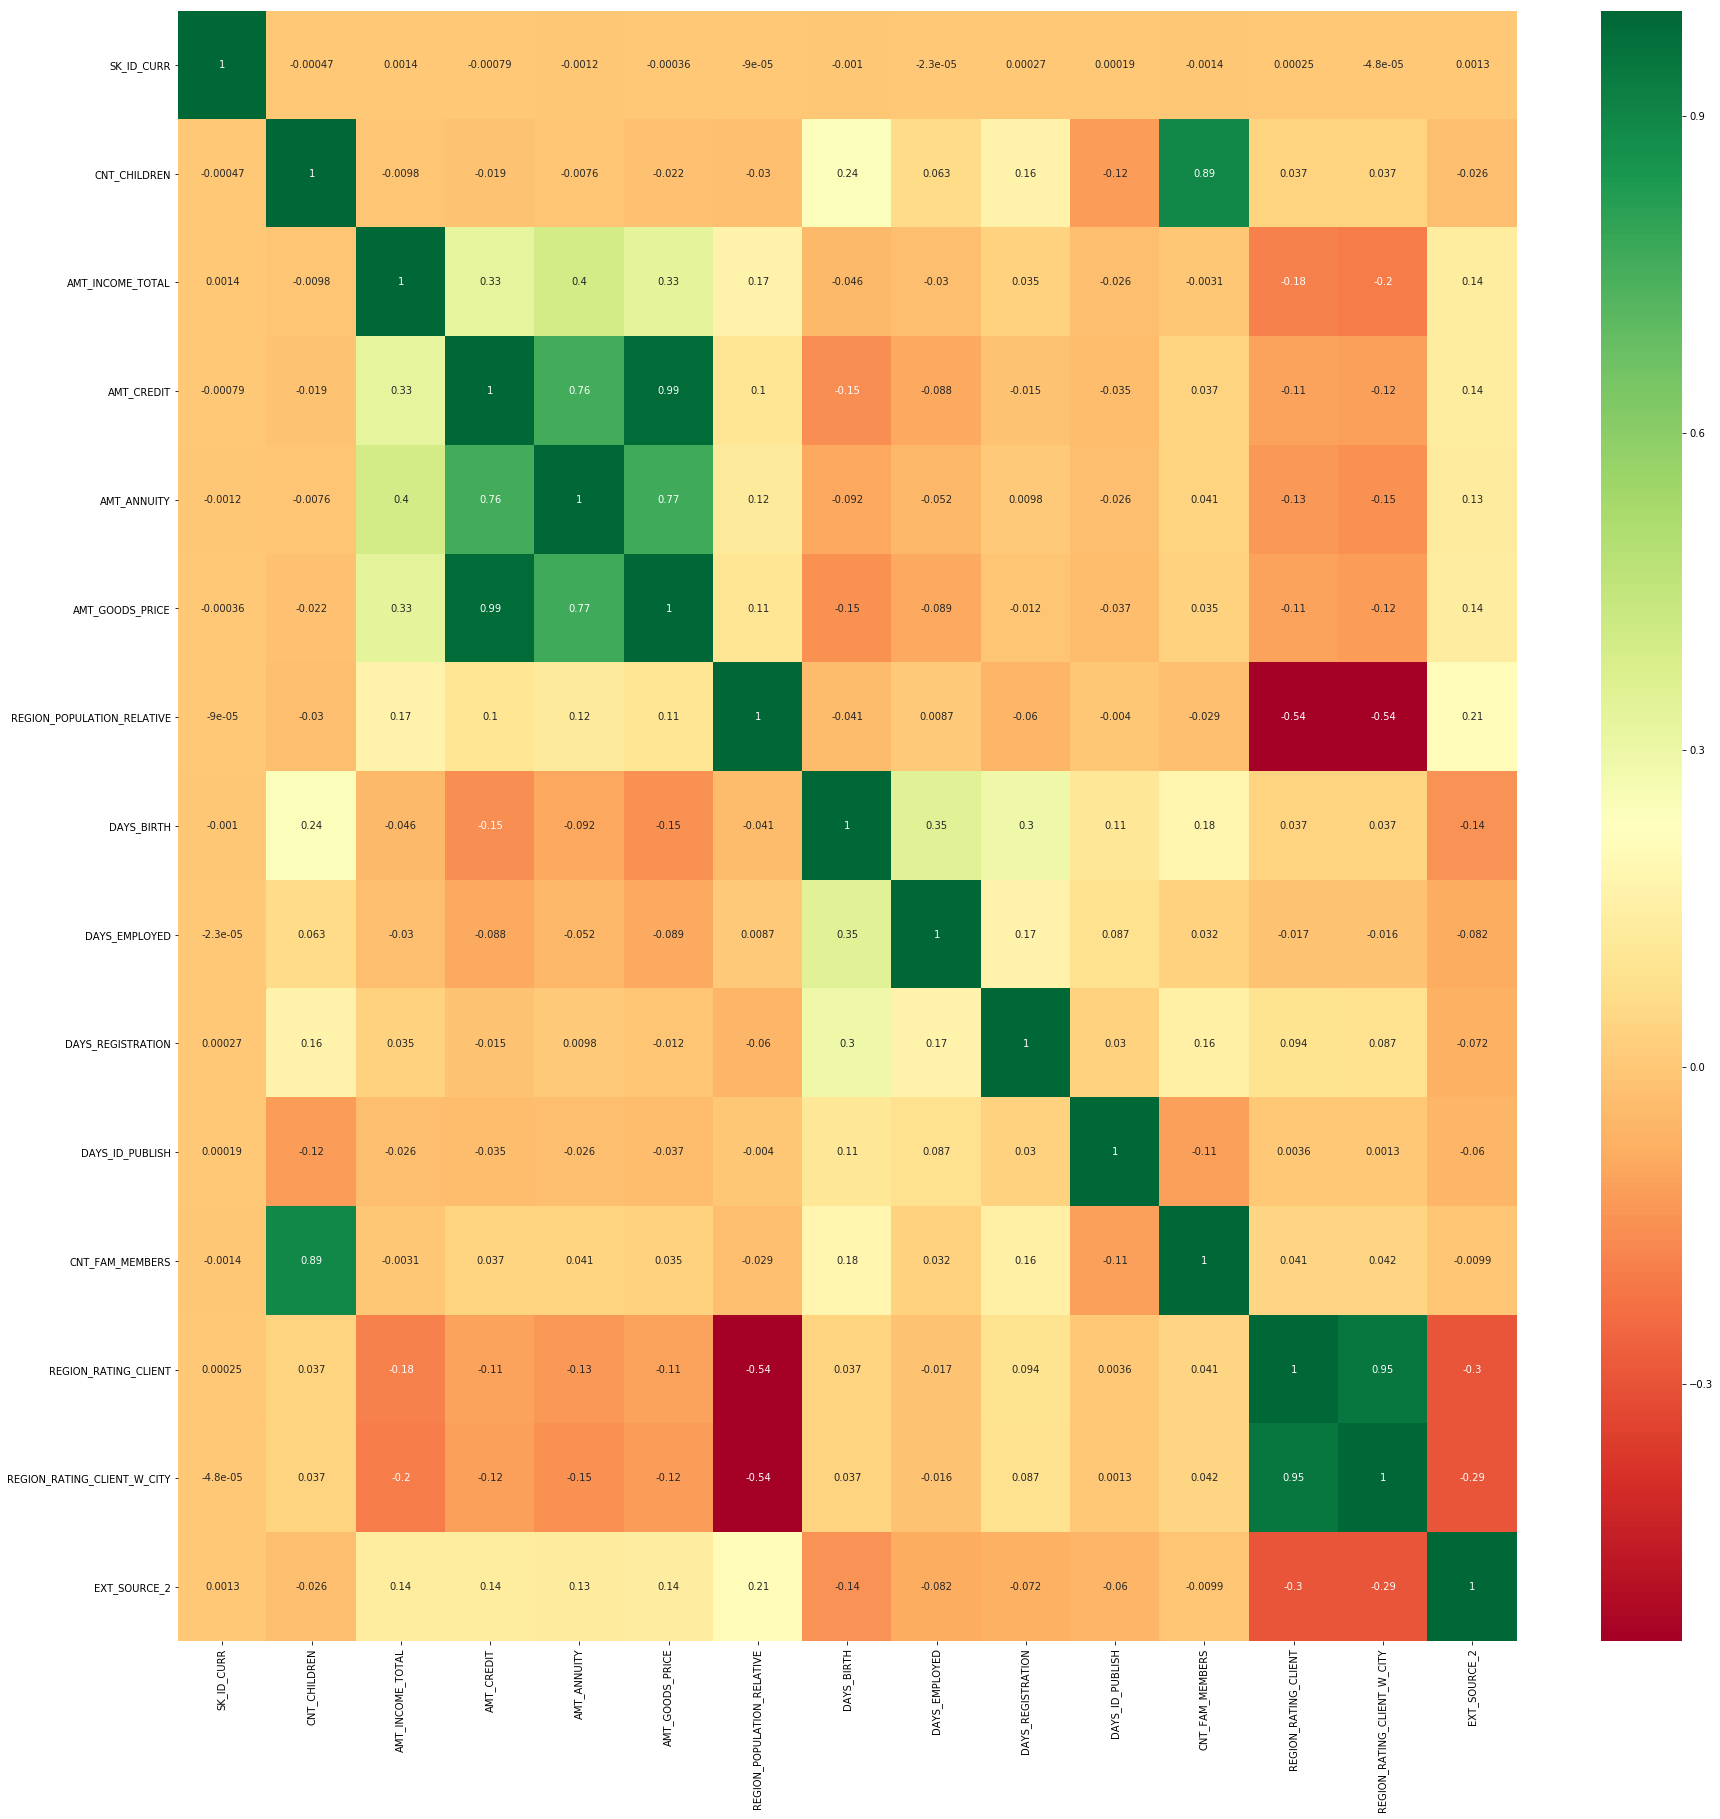

In [200]:
corrmat = df0_num.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df0_num[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<b> Univariate analysis of the numeical variable <b>

In [ ]:
#univariate analysis of the CNT_CHIlDREN
df0_num=

In [66]:
# lets define a function to plot across categorical variables for tg_0
def plot_cat(varx,vary):
    sns.barplot(x=varx, y=vary, data=Tg_0,ci=False)
    plt.show()

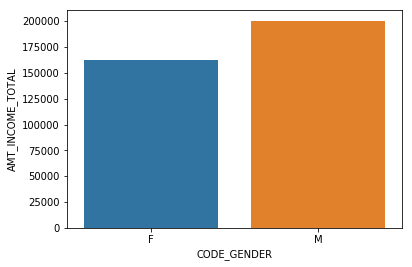

In [67]:
plot_cat('CODE_GENDER','AMT_INCOME_TOTAL')

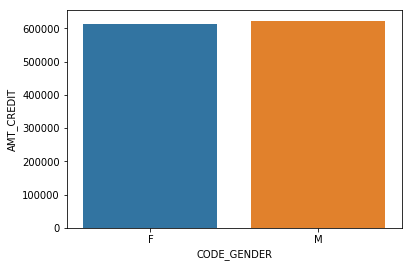

In [68]:
plot_cat('CODE_GENDER','AMT_CREDIT')

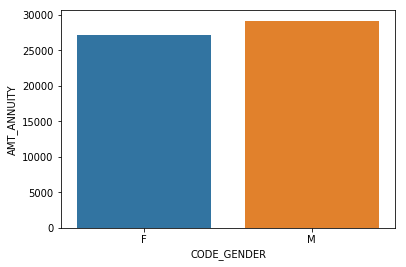

In [69]:
plot_cat('CODE_GENDER','AMT_ANNUITY')

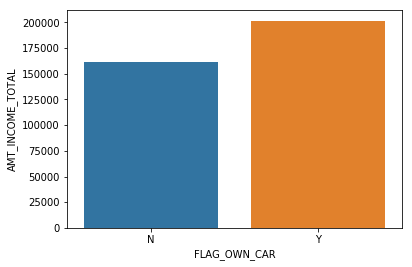

In [70]:
plot_cat('FLAG_OWN_CAR','AMT_INCOME_TOTAL')

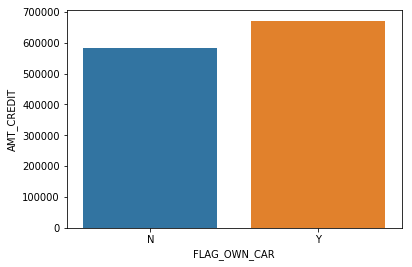

In [71]:
plot_cat('FLAG_OWN_CAR','AMT_CREDIT')

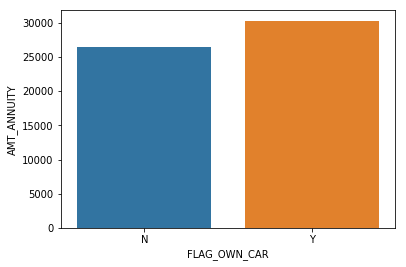

In [72]:
plot_cat('FLAG_OWN_CAR','AMT_ANNUITY')

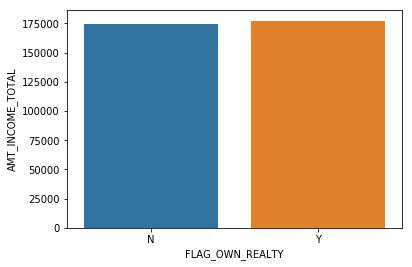

In [73]:
plot_cat('FLAG_OWN_REALTY','AMT_INCOME_TOTAL')

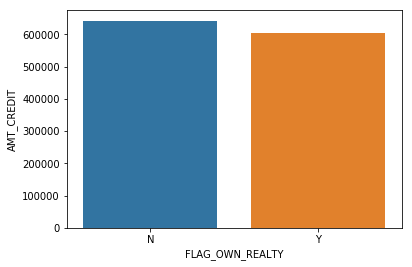

In [74]:
plot_cat('FLAG_OWN_REALTY','AMT_CREDIT')

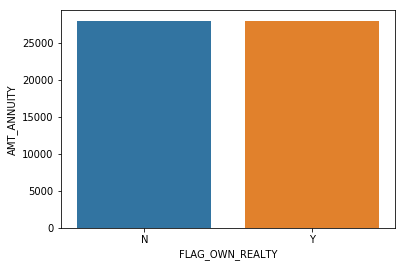

In [75]:
plot_cat('FLAG_OWN_REALTY','AMT_ANNUITY')

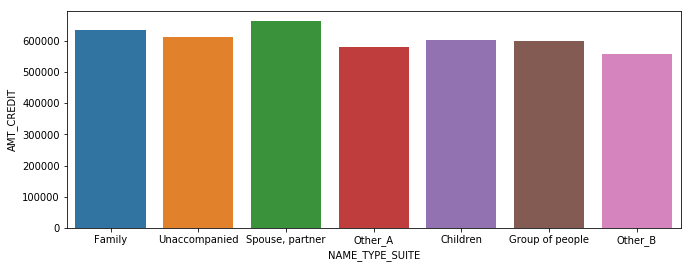

In [76]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_CREDIT')

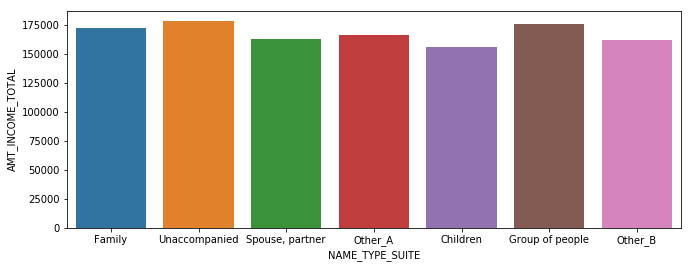

In [77]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_INCOME_TOTAL')

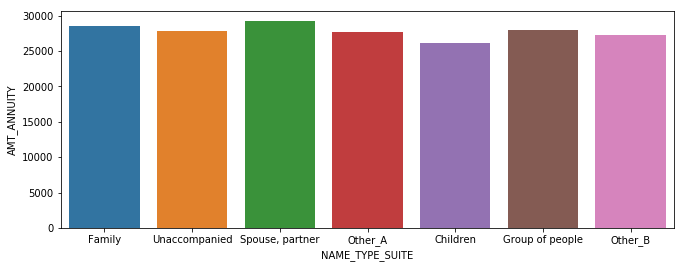

In [78]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_ANNUITY')

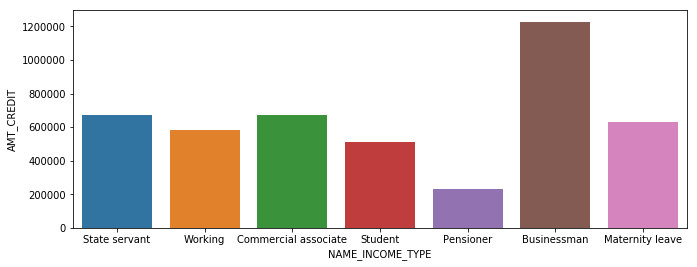

In [79]:
#NAME_INCOME_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_CREDIT')

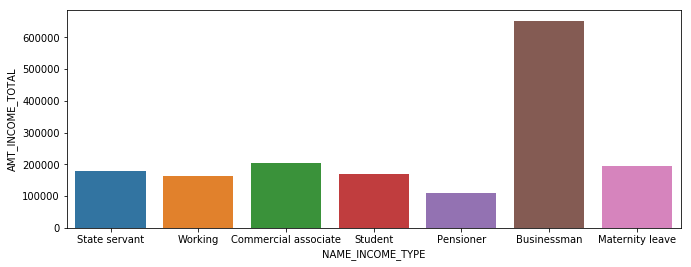

In [80]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_INCOME_TOTAL')

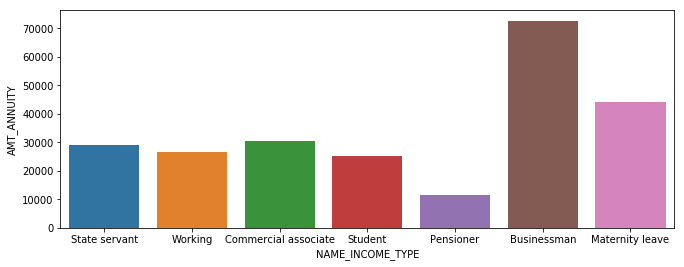

In [81]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_ANNUITY')

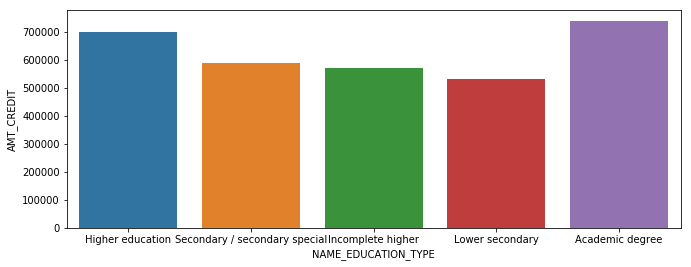

In [82]:
#NAME_EDUCATION_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_CREDIT')

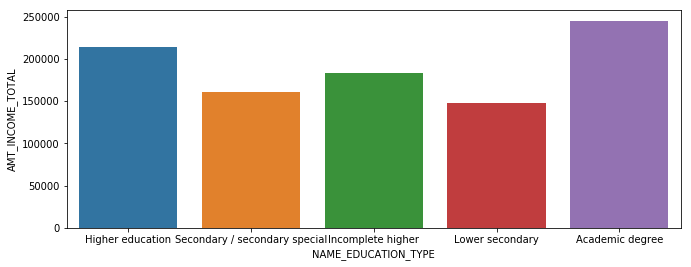

In [83]:
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL')

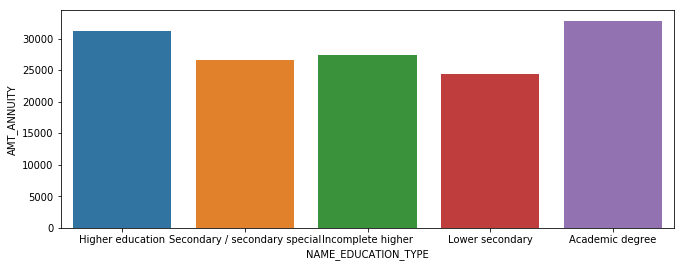

In [84]:
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_ANNUITY')

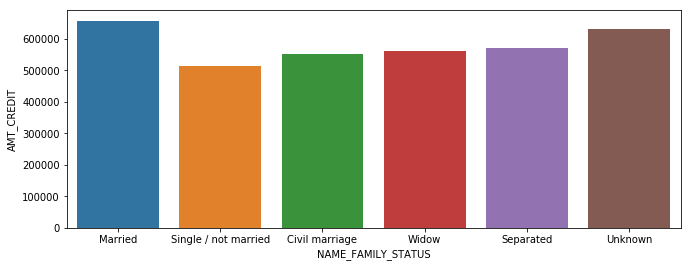

In [85]:
#NAME_FAMILY_STATUS 
plt.figure(figsize=(11,4))
plot_cat('NAME_FAMILY_STATUS','AMT_CREDIT')

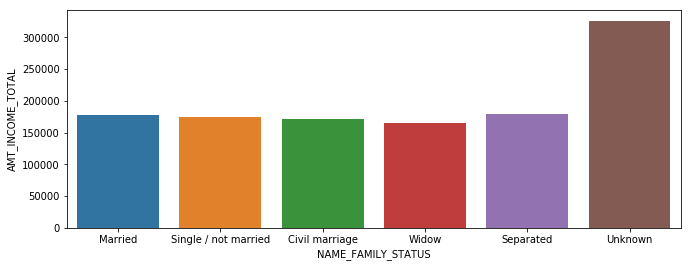

In [86]:
plt.figure(figsize=(11,4))
plot_cat('NAME_FAMILY_STATUS','AMT_INCOME_TOTAL')

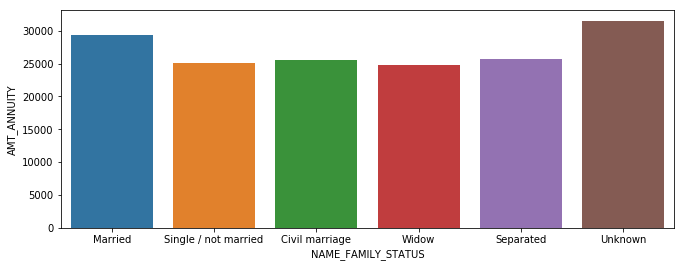

In [87]:
plt.figure(figsize=(11,4))
plot_cat('NAME_FAMILY_STATUS','AMT_ANNUITY')

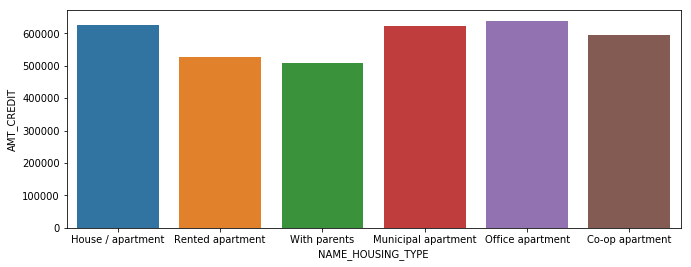

In [88]:
#NAME_HOUSING_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_HOUSING_TYPE','AMT_CREDIT')

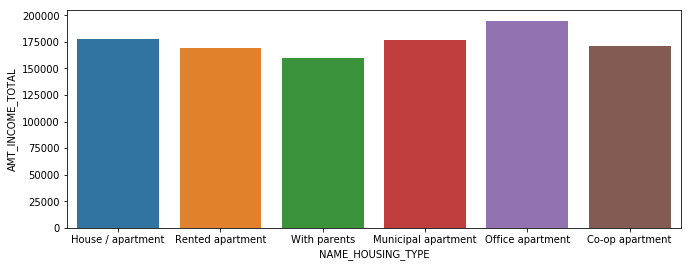

In [89]:
plt.figure(figsize=(11,4))
plot_cat('NAME_HOUSING_TYPE','AMT_INCOME_TOTAL')

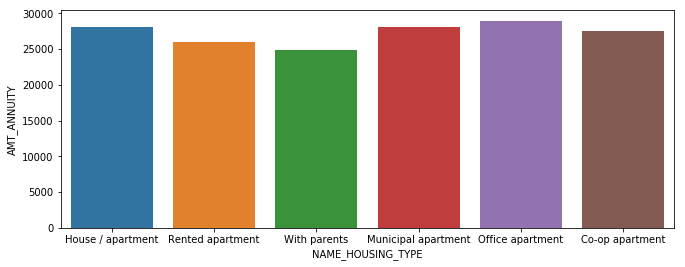

In [90]:
plt.figure(figsize=(11,4))
plot_cat('NAME_HOUSING_TYPE','AMT_ANNUITY')

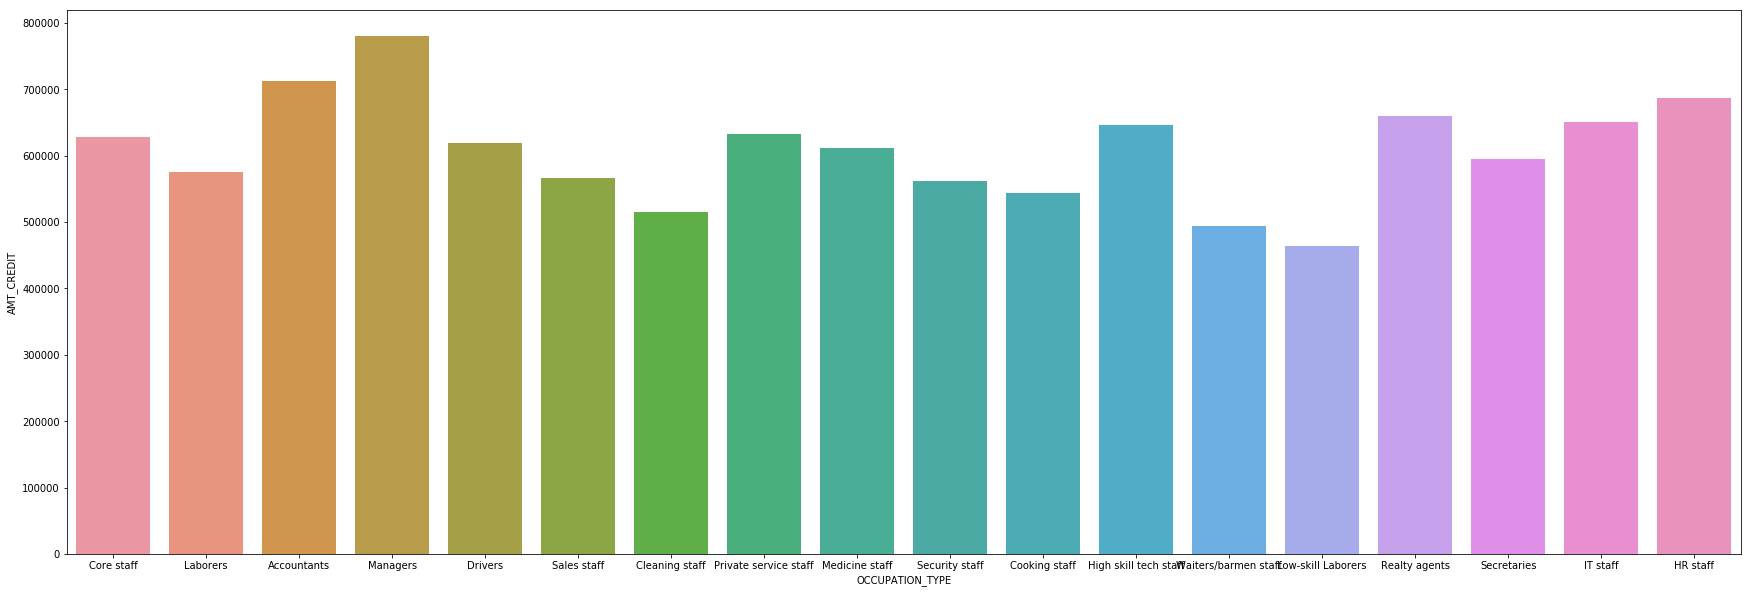

In [91]:
#OCCUPATION_TYPE 
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_CREDIT')

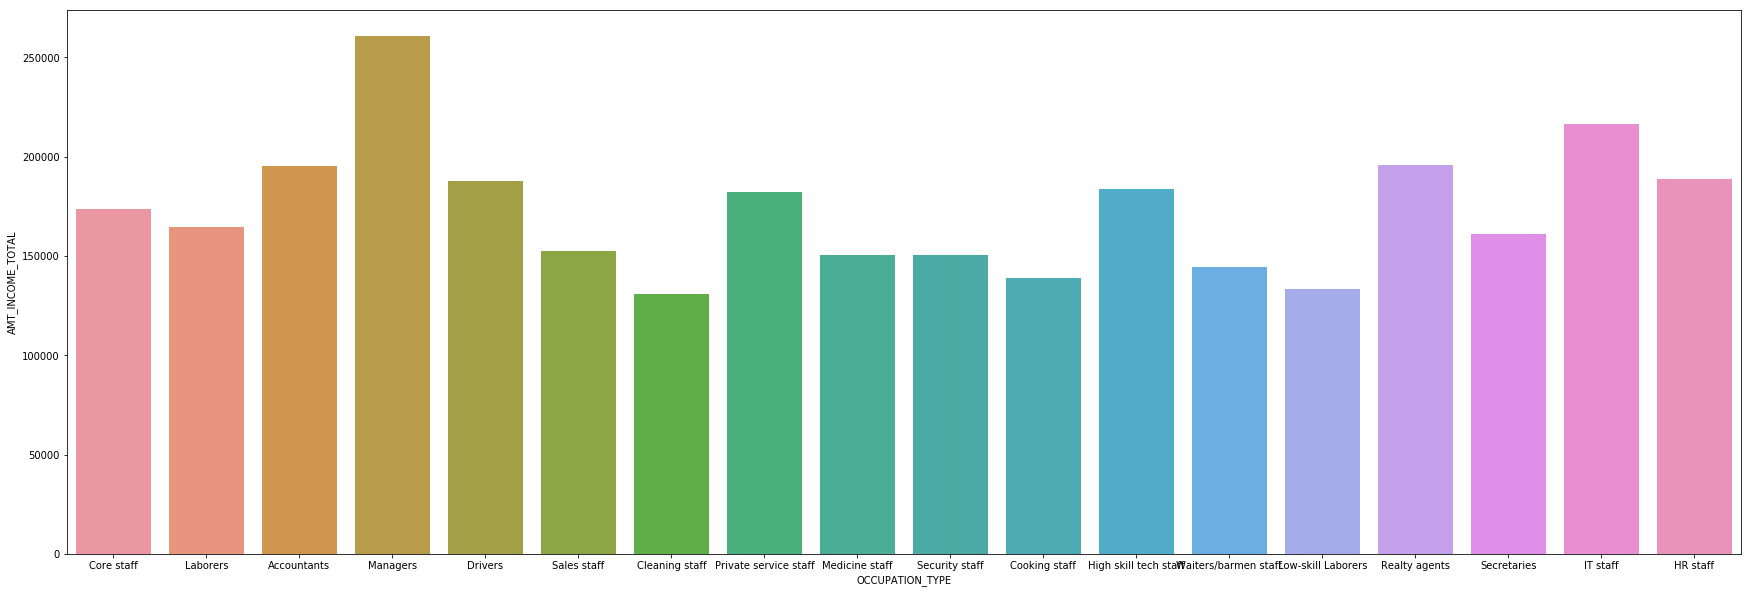

In [92]:
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_INCOME_TOTAL')

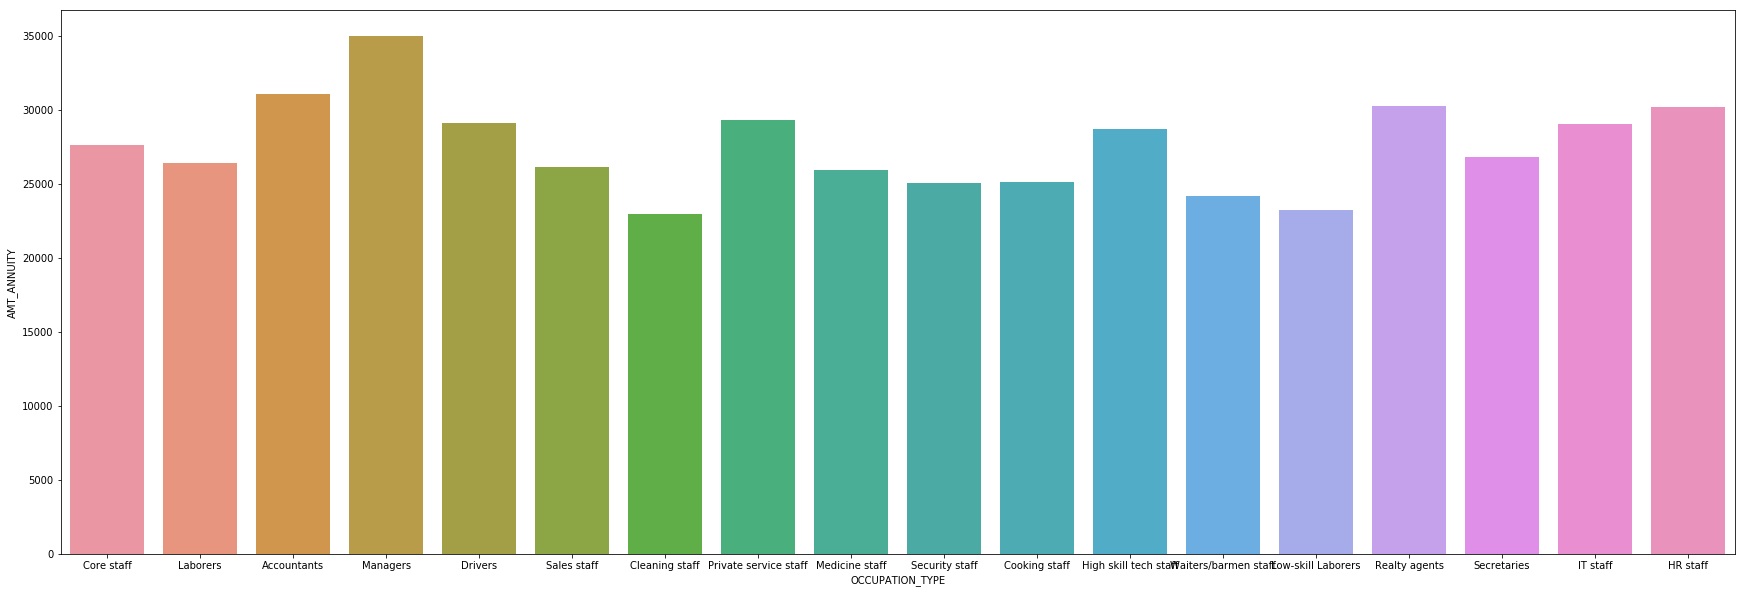

In [93]:
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_ANNUITY')

In [94]:
def plot_cat(varx,vary):
    sns.barplot(x=varx, y=vary, data=Tg_1,ci=False)
    plt.show()

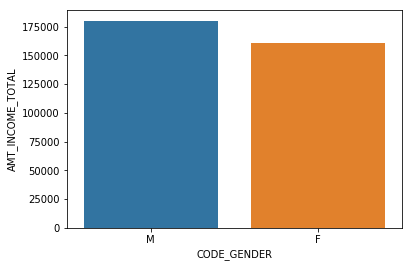

In [95]:
plot_cat('CODE_GENDER','AMT_INCOME_TOTAL')

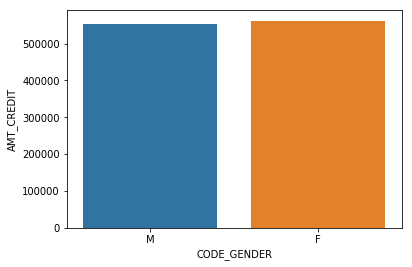

In [96]:
plot_cat('CODE_GENDER','AMT_CREDIT')

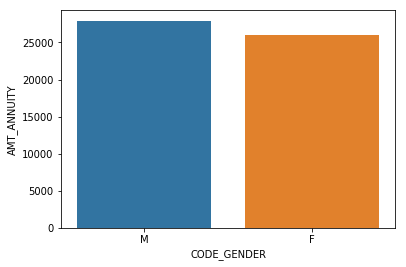

In [97]:
plot_cat('CODE_GENDER','AMT_ANNUITY')

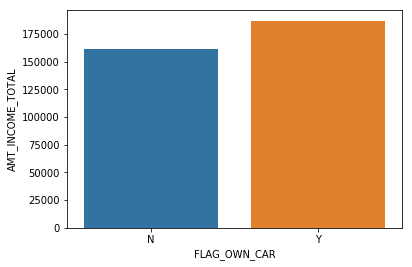

In [98]:
plot_cat('FLAG_OWN_CAR','AMT_INCOME_TOTAL')

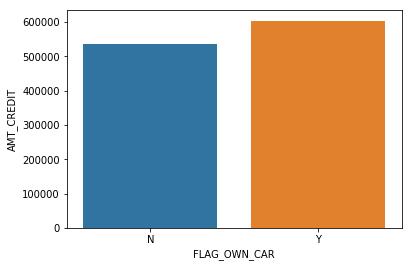

In [99]:
plot_cat('FLAG_OWN_CAR','AMT_CREDIT')

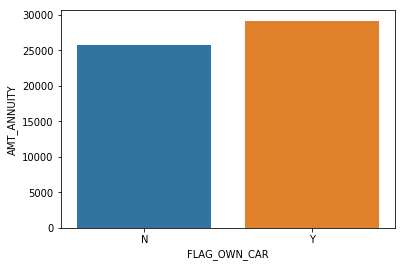

In [100]:
plot_cat('FLAG_OWN_CAR','AMT_ANNUITY')

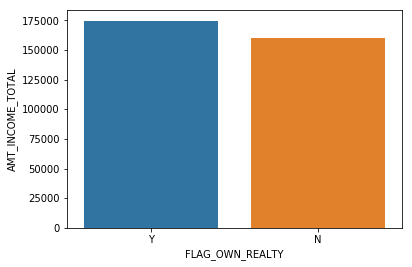

In [101]:
plot_cat('FLAG_OWN_REALTY','AMT_INCOME_TOTAL')

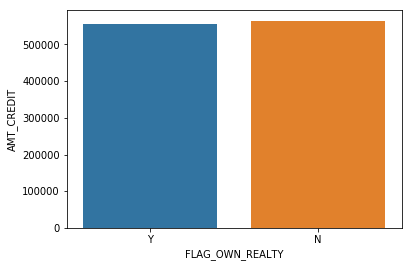

In [102]:
plot_cat('FLAG_OWN_REALTY','AMT_CREDIT')

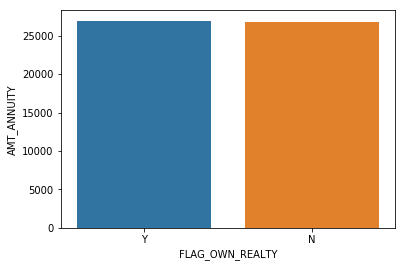

In [103]:
plot_cat('FLAG_OWN_REALTY','AMT_ANNUITY')

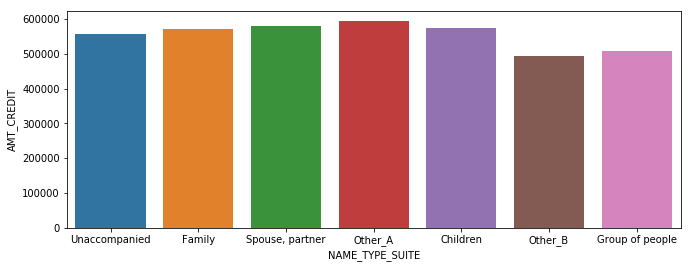

In [104]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_CREDIT')

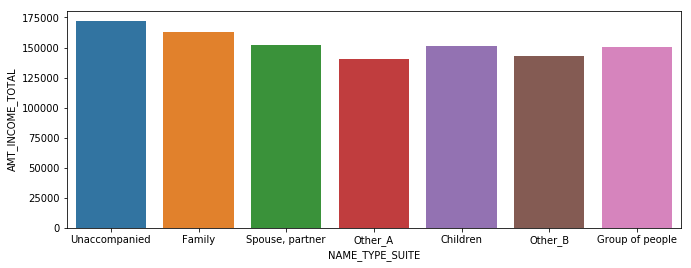

In [105]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_INCOME_TOTAL')

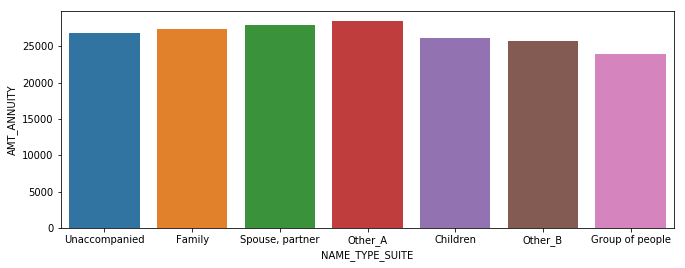

In [106]:
plt.figure(figsize=(11,4))
plot_cat('NAME_TYPE_SUITE','AMT_ANNUITY')

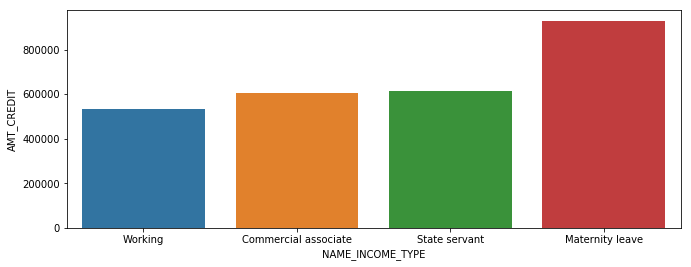

In [107]:
#NAME_INCOME_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_CREDIT')

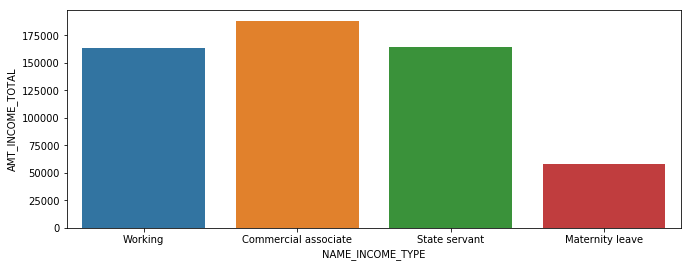

In [108]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_INCOME_TOTAL')

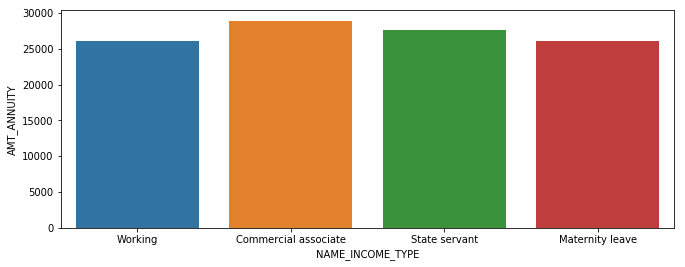

In [109]:
plt.figure(figsize=(11,4))
plot_cat('NAME_INCOME_TYPE','AMT_ANNUITY')

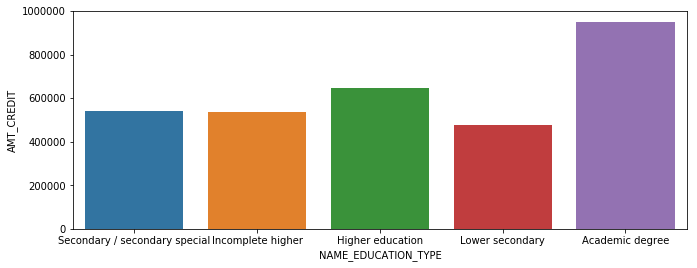

In [110]:
#NAME_EDUCATION_TYPE
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_CREDIT')

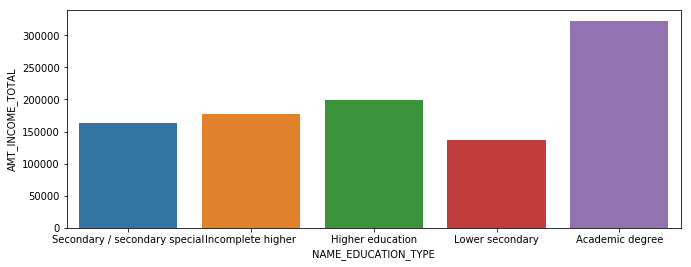

In [111]:
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL')

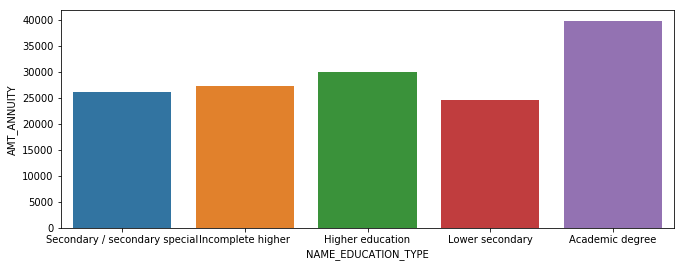

In [112]:
plt.figure(figsize=(11,4))
plot_cat('NAME_EDUCATION_TYPE','AMT_ANNUITY')

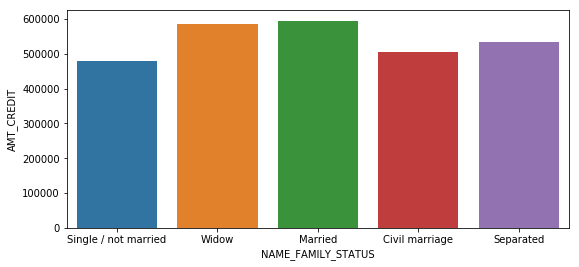

In [113]:
#NAME_FAMILY_STATUS 
plt.figure(figsize=(9,4))
plot_cat('NAME_FAMILY_STATUS','AMT_CREDIT')

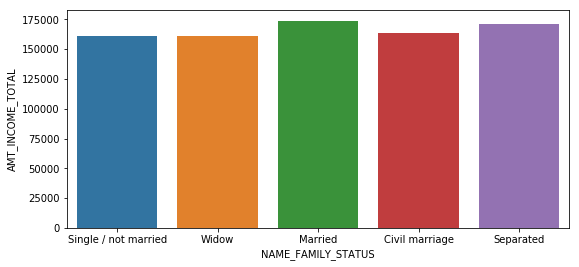

In [114]:
 plt.figure(figsize=(9,4))
plot_cat('NAME_FAMILY_STATUS','AMT_INCOME_TOTAL')

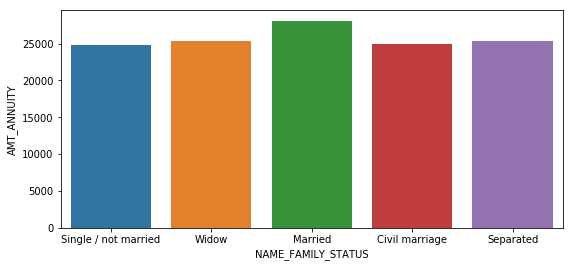

In [115]:
plt.figure(figsize=(9,4))
plot_cat('NAME_FAMILY_STATUS','AMT_ANNUITY')

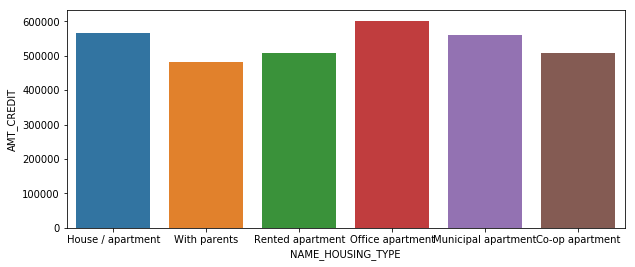

In [116]:
#NAME_HOUSING_TYPE
plt.figure(figsize=(10,4))
plot_cat('NAME_HOUSING_TYPE','AMT_CREDIT')

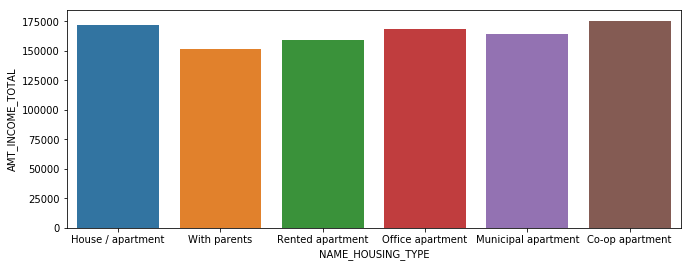

In [117]:
plt.figure(figsize=(11,4))
plot_cat('NAME_HOUSING_TYPE','AMT_INCOME_TOTAL')

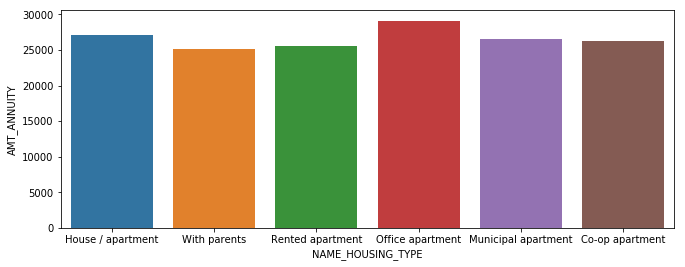

In [118]:
plt.figure(figsize=(11,4))
plot_cat('NAME_HOUSING_TYPE','AMT_ANNUITY')

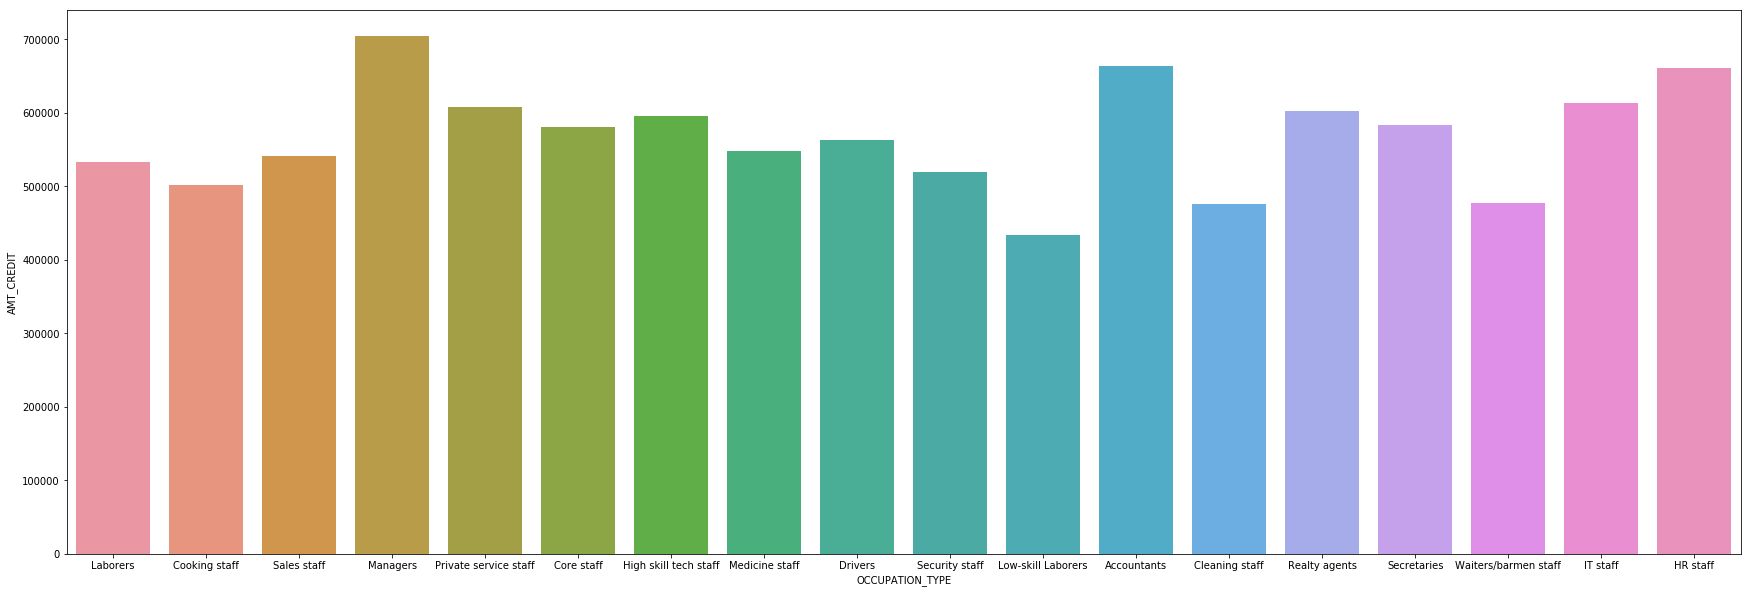

In [119]:
#OCCUPATION_TYPE 
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_CREDIT')

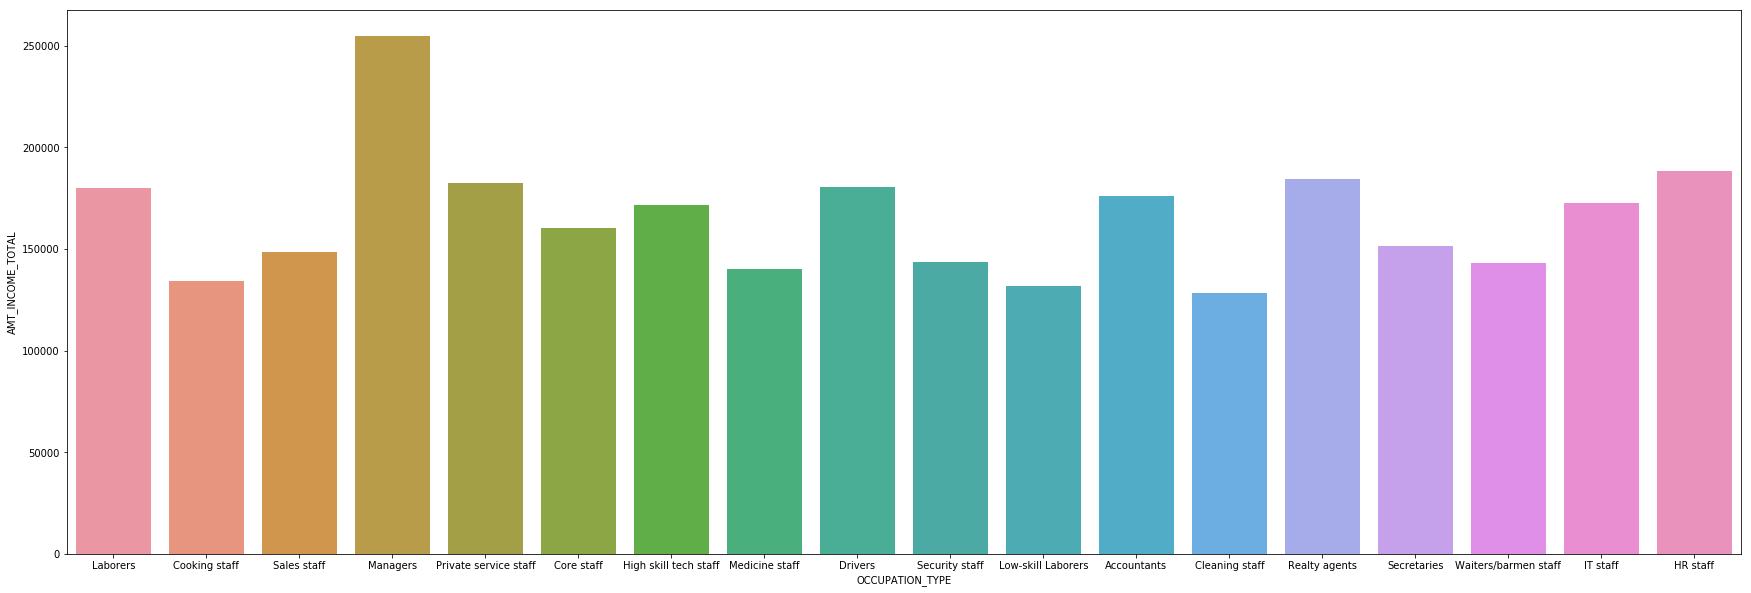

In [120]:
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_INCOME_TOTAL')

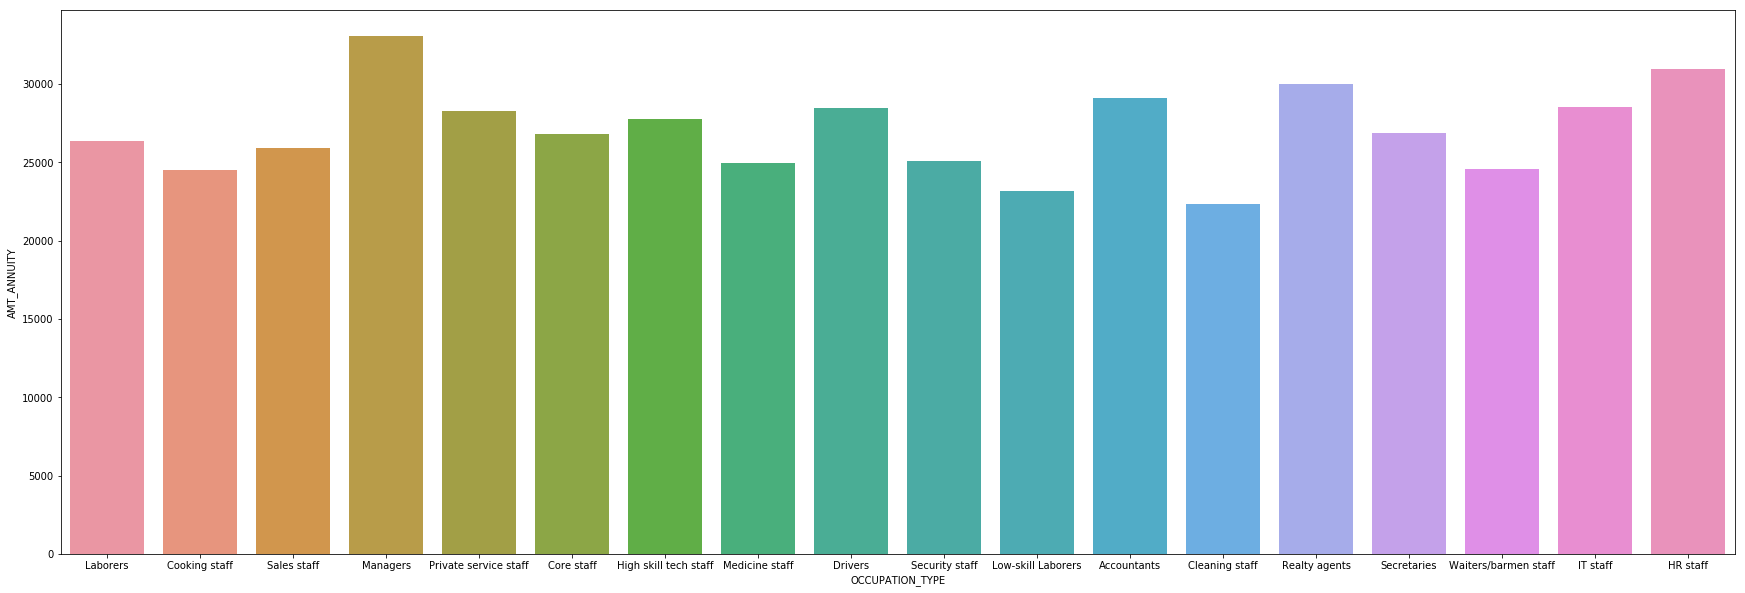

In [121]:
plt.figure(figsize=(30,10))
plot_cat('OCCUPATION_TYPE','AMT_ANNUITY')